# Musical Ambiguous Figures Visualizations and Analysis

**Author:** Sarah Gates

**Contact:** sarahgates22@gmail.com

[Github](https://github.com/Saz2049) <br>
[LinkedIn](https://www.linkedin.com/in/sarah-gates-/)

**Date:** Summer 2022


## Introduction

This notebook includes the exploratory data analysis for both dependent variables (ease of hearing and ease of change ratings), as well as the visualizations for the repeated-measures ANOVAs completed in R. The end of the notebook contains the analysis and visualizations for relevant biographical information, as well as analysis and visualizations for familiarity ratings.

`Random_IDs:` randomly generated integer, unique identifier for each participant <br>
`Sonata_Section:` the section of the sonata form from which the stimuli was taken for that trial (or row, is either exposition or recapitulation) <br>
`Feature:` the feature (soprano scale degree line, bass scale degree line, or schema) that the participant attended to in that trial (or row) <br>
`Mod_Type:` the modulation type indicated by the schema (Prinner: modulating, Romanesca: non-modulating) for the trial <br>
`Education_Level:` the education level of the participant (graduate student, post-doc, professor, other) <br>
`Year_Theory:` the years of music theory training and/or teaching for each participant <br>
`Years_Skills:` the years of aural skills training and/or teaching for each participant <br>
`Schemata_Expertise:` self-reported expertise in Galant schemata theory (completely unfamiliar, somewhat familiar, familiar, very familiar, I am an expert) <br>
`Excerpt_Familiarity:` self-reported familiarity with the sonata (Mozart, K 280) (First time hearing this, hear before, very familiary) <br>
`Excerpt_Analysis:` indicates whether the participant has performed score analysis of the sonata (no not at all, yes somewhat, yes extensively) <br>
`Solfege_Hearing:` integer from 1-7 indicating the participants' ability to hear scale degrees while listening (1: cannot hear, 7: can easily hear) <br>
`Schema_Hearing:` integer from 1-7 indicating the participants' ability to hear Galant schemata while listening (1: cannot hear, 7: can easily hear) <br>
`Perfect_Pitch:` whether the participant has perfect pitch or not (yes/no) <br>
`Interpretation_App:` string of options selected by the participant about how they formed interpretations of the excerpt (e.g., imagery, subvocalization, etc.) <br>
`Expertise_Group:` constructed variable (see data cleaning notebook) indicating the participants' Galant schema expertise level (novice, intermediate, expert) <br>
`Expertise_Group_solf:` constructed variable (see data cleaning notebook) indicating the participants' solfege expertise level (novice, intermediate, expert) <br>
`Order Variables:` variables indicating the order of presentation for each level of stimuli presentation (e.g., Sonata Order = 1 means that the stimuli was presented in the order 'exposition' then 'recapitulation') <br>

**Targets**

`DV:` ease of hearing rating on a scale from 1-7 <br>
`DV2:` ease of change rating on a scale from 1-7

## Table of Contents

1. [Data Loading](#1.-Data-Loading)
<br>

2. [Exploratory Analysis: DV1](#2.-Exploratory-Analysis:-DV1)
    * [a. Outliers](#a.-Outliers)
    * [b. Data Summaries and Pivot Tables](#b.-Data-Summaries-and-Pivot-Tables) 
        * [i. Main Effects](#i.-Main-Effects)
        * [ii. Two-Way Interactions](#ii.-Two-Way-Interactions)
        * [iii. Effects of Order](#iii.-Effects-of-Order)
        
        <br>
3. [Exploratory Analysis: DV2](#3.-Exploratory-Analysis:-DV2-(ease-of-change))
    * [a. Outliers](#O2)
    * [b. Data Summaries and Pivot Tables](#DS2)
        * [i. Main Effects](#DS1i) 
        * [ii. Effects of Order](#DS1ii)
        
        <br>
4. [Visualizations for RM ANOVA: DV1](#4.-Visualizations-for-RM-ANOVA:-DV1)
    * [a. Main Effects](#RM1a)
    * [b. Interaction Effects](#RM1b)
    
    <br>
    
5. [Visualizations for RM ANOVA: DV2](#)
    * [a. Main Effects](#RM2a)

    <br>
    
6. [Biographical and Summary Statistics](#6.-Biographical-and-Summary-Statistics)
<br>

7. [Familiarity Analysis](#7.-Familiarity-Analysis)

Loading the required libraries:

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
from scipy import stats
import plotly.express as px
from pylab import rcParams

##  1. Data Loading

First I will load and examine the data for DV1, DV2, and both DVs combined.

**DV1: Ease of Hearing**

In [2]:
df1 = pd.read_csv('data/amb_DV1_fin.csv') # loading the dataset without the outlier

In [3]:
df1.head(5)

,Unnamed: 0,Random_IDs,Sonata_Section,Feature,Mod_Type,DV,Education_Level,Years_Theory,Years_Skills,Schemata_Expertise,...,Expertise_Group_solf,Sonata_Order,Expo_Order,Expo_Bass_Order,Expo_Sop_Order,Expo_Schema_Order,Recap_Order,Recap_Bass_Order,Recap_Sop_Order,Recap_Schema_Order
0,0,913,Exposition,Bass,Romanesca,7.0,Professor,10 + years,10 + years,Completely unfamiliar,...,Expert,2,5,1,1,2,3,1,1,2
1,1,834,Exposition,Bass,Romanesca,5.1,Graduate Student,5-10 years,5-10 years,Familiar,...,Intermediate,1,3,2,2,2,1,2,2,1
2,2,719,Exposition,Bass,Romanesca,6.5,Graduate Student,1-2 years,3-5 years,Somewhat familiar,...,Intermediate,2,3,2,2,1,6,2,1,1
3,3,862,Exposition,Bass,Romanesca,4.6,Graduate Student,5-10 years,5-10 years,Very familiar,...,Intermediate,1,3,1,1,1,3,1,2,2
4,4,686,Exposition,Bass,Romanesca,7.0,Professor,10 + years,10 + years,Very familiar,...,Expert,2,1,2,1,1,4,1,1,1


Resetting the index:

In [4]:
df_DV1_long = df1.set_index(keys='Unnamed: 0')

df_DV1_long.index.names = ['Index']

df_DV1_long

,Random_IDs,Sonata_Section,Feature,Mod_Type,DV,Education_Level,Years_Theory,Years_Skills,Schemata_Expertise,Excerpt_Familiarity,...,Expertise_Group_solf,Sonata_Order,Expo_Order,Expo_Bass_Order,Expo_Sop_Order,Expo_Schema_Order,Recap_Order,Recap_Bass_Order,Recap_Sop_Order,Recap_Schema_Order
Index,,,,,,,,,,,,,,,,,,,,,
0,913,Exposition,Bass,Romanesca,7.0,Professor,10 + years,10 + years,Completely unfamiliar,I have heard this before,...,Expert,2,5,1,1,2,3,1,1,2
1,834,Exposition,Bass,Romanesca,5.1,Graduate Student,5-10 years,5-10 years,Familiar,This was the first time I have heard this,...,Intermediate,1,3,2,2,2,1,2,2,1
2,719,Exposition,Bass,Romanesca,6.5,Graduate Student,1-2 years,3-5 years,Somewhat familiar,I have heard this before,...,Intermediate,2,3,2,2,1,6,2,1,1
3,862,Exposition,Bass,Romanesca,4.6,Graduate Student,5-10 years,5-10 years,Very familiar,This was the first time I have heard this,...,Intermediate,1,3,1,1,1,3,1,2,2
4,686,Exposition,Bass,Romanesca,7.0,Professor,10 + years,10 + years,Very familiar,This was the first time I have heard this,...,Expert,2,1,2,1,1,4,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15,244,Recapitulation,Schema,Prinner,7.0,Professor,10 + years,10 + years,"I am an expert (analysis, playing, composition...",I have heard this before,...,Expert,2,1,2,1,1,2,2,2,1
16,148,Recapitulation,Schema,Prinner,6.0,Professor,10 + years,10 + years,Somewhat familiar,I have heard this before,...,Intermediate,1,5,2,1,1,4,1,1,1
17,701,Recapitulation,Schema,Prinner,7.0,Graduate Student,10 + years,10 + years,Very familiar,I have heard this before,...,Intermediate,2,3,1,2,2,6,1,2,2


In [5]:
df_DV1_long.describe()

,Random_IDs,DV,Solfege_Hearing,Schema_Hearing,Sonata_Order,Expo_Order,Expo_Bass_Order,Expo_Sop_Order,Expo_Schema_Order,Recap_Order,Recap_Bass_Order,Recap_Sop_Order,Recap_Schema_Order
count,228.000000,228.000000,228.000000,228.000000,228.000000,228.000000,228.000000,228.000000,228.000000,228.000000,228.000000,228.000000,228.000000
mean,591.210526,4.919737,6.068421,4.505263,1.631579,3.105263,1.473684,1.473684,1.421053,3.526316,1.526316,1.421053,1.526316
std,255.110358,1.999979,0.942423,2.042148,0.483438,1.777829,0.500406,0.500406,0.494814,1.605116,0.500406,0.494814,0.500406
min,148.000000,1.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,381.000000,3.650000,5.500000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000
50%,540.000000,5.500000,6.100000,4.900000,2.000000,3.000000,1.000000,1.000000,1.000000,3.000000,2.000000,1.000000,2.000000
75%,862.000000,6.825000,7.000000,6.700000,2.000000,5.000000,2.000000,2.000000,2.000000,5.000000,2.000000,2.000000,2.000000
max,998.000000,7.000000,7.000000,7.000000,2.000000,6.000000,2.000000,2.000000,2.000000,6.000000,2.000000,2.000000,2.000000


Checking one of the indecies:

In [6]:
df_DV1_long.loc[18, :]

,Random_IDs,Sonata_Section,Feature,Mod_Type,DV,Education_Level,Years_Theory,Years_Skills,Schemata_Expertise,Excerpt_Familiarity,...,Expertise_Group_solf,Sonata_Order,Expo_Order,Expo_Bass_Order,Expo_Sop_Order,Expo_Schema_Order,Recap_Order,Recap_Bass_Order,Recap_Sop_Order,Recap_Schema_Order
Index,,,,,,,,,,,,,,,,,,,,,
18,540,Exposition,Bass,Romanesca,7.0,Professor,5-10 years,5-10 years,"I am an expert (analysis, playing, composition...",I have heard this before,...,Expert,2,3,2,2,2,4,2,2,2
18,540,Exposition,Bass,Prinner,7.0,Professor,5-10 years,5-10 years,"I am an expert (analysis, playing, composition...",I have heard this before,...,Expert,2,3,2,2,2,4,2,2,2
18,540,Exposition,Soprano,Romanesca,7.0,Professor,5-10 years,5-10 years,"I am an expert (analysis, playing, composition...",I have heard this before,...,Expert,2,3,2,2,2,4,2,2,2
18,540,Exposition,Soprano,Prinner,5.3,Professor,5-10 years,5-10 years,"I am an expert (analysis, playing, composition...",I have heard this before,...,Expert,2,3,2,2,2,4,2,2,2
18,540,Exposition,Schema,Romanesca,4.0,Professor,5-10 years,5-10 years,"I am an expert (analysis, playing, composition...",I have heard this before,...,Expert,2,3,2,2,2,4,2,2,2
18,540,Exposition,Schema,Prinner,7.0,Professor,5-10 years,5-10 years,"I am an expert (analysis, playing, composition...",I have heard this before,...,Expert,2,3,2,2,2,4,2,2,2
18,540,Recapitulation,Bass,Romanesca,7.0,Professor,5-10 years,5-10 years,"I am an expert (analysis, playing, composition...",I have heard this before,...,Expert,2,3,2,2,2,4,2,2,2
18,540,Recapitulation,Bass,Prinner,7.0,Professor,5-10 years,5-10 years,"I am an expert (analysis, playing, composition...",I have heard this before,...,Expert,2,3,2,2,2,4,2,2,2
18,540,Recapitulation,Soprano,Romanesca,6.3,Professor,5-10 years,5-10 years,"I am an expert (analysis, playing, composition...",I have heard this before,...,Expert,2,3,2,2,2,4,2,2,2


Checking one of the variables:

In [7]:
df_DV1_long.Excerpt_Analysis.value_counts()

No, not at all    180
Yes, somewhat      48
Name: Excerpt_Analysis, dtype: int64

Double checking for null values:

In [8]:
# Checking nulls
df_DV1_long.isnull().sum()

Random_IDs              0
Sonata_Section          0
Feature                 0
Mod_Type                0
DV                      0
Education_Level         0
Years_Theory            0
Years_Skills            0
Schemata_Expertise      0
Excerpt_Familiarity     0
Excerpt_Analysis        0
Solfege_Hearing         0
Schema_Hearing          0
Perfect_Pitch?          0
Interpretation_App      0
Expertise_Group         0
Expertise_Group_solf    0
Sonata_Order            0
Expo_Order              0
Expo_Bass_Order         0
Expo_Sop_Order          0
Expo_Schema_Order       0
Recap_Order             0
Recap_Bass_Order        0
Recap_Sop_Order         0
Recap_Schema_Order      0
dtype: int64

Checking for duplicates:

In [9]:
# checking duplicate rows

df_DV1_long.duplicated().sum()

0

In [10]:
# checking duplicate columns

df_DV1_long.T.duplicated().sum()

0

**DV2: Ease of Change**

Loading in the data for the second dependent variable, ease of change ratings:

In [11]:
df2 = pd.read_csv('data/amb_DV2_fin.csv')

df_DV2_long = df2.set_index(keys='Unnamed: 0')

df_DV2_long.index.names = ['Index']

df_DV2_long.head(5)

,Random_IDs,Sonata_Section,Feature,DV2,Education_Level,Years_Theory,Years_Skills,Schemata_Expertise,Excerpt_Familiarity,Excerpt_Analysis,...,Expertise_Group_solf,Sonata_Order,Expo_Order,Expo_Bass_Order,Expo_Sop_Order,Expo_Schema_Order,Recap_Order,Recap_Bass_Order,Recap_Sop_Order,Recap_Schema_Order
Index,,,,,,,,,,,,,,,,,,,,,
0,913,Exposition,Bass,3.0,Professor,10 + years,10 + years,Completely unfamiliar,I have heard this before,"No, not at all",...,Expert,2,5,1,1,2,3,1,1,2
1,834,Exposition,Bass,4.7,Graduate Student,5-10 years,5-10 years,Familiar,This was the first time I have heard this,"No, not at all",...,Intermediate,1,3,2,2,2,1,2,2,1
2,719,Exposition,Bass,6.0,Graduate Student,1-2 years,3-5 years,Somewhat familiar,I have heard this before,"No, not at all",...,Intermediate,2,3,2,2,1,6,2,1,1
3,862,Exposition,Bass,6.0,Graduate Student,5-10 years,5-10 years,Very familiar,This was the first time I have heard this,"No, not at all",...,Intermediate,1,3,1,1,1,3,1,2,2
4,686,Exposition,Bass,6.3,Professor,10 + years,10 + years,Very familiar,This was the first time I have heard this,"No, not at all",...,Expert,2,1,2,1,1,4,1,1,1


In [12]:
df_DV2_long.columns

Index(['Random_IDs', 'Sonata_Section', 'Feature', 'DV2', 'Education_Level',
       'Years_Theory', 'Years_Skills', 'Schemata_Expertise',
       'Excerpt_Familiarity', 'Excerpt_Analysis', 'Solfege_Hearing',
       'Schema_Hearing', 'Perfect_Pitch?', 'Interpretation_App',
       'Expertise_Group', 'Expertise_Group_solf', 'Sonata_Order', 'Expo_Order',
       'Expo_Bass_Order', 'Expo_Sop_Order', 'Expo_Schema_Order', 'Recap_Order',
       'Recap_Bass_Order', 'Recap_Sop_Order', 'Recap_Schema_Order'],
      dtype='object')

Double checking for nulls:

In [13]:
df_DV2_long.isnull().sum()

Random_IDs              0
Sonata_Section          0
Feature                 0
DV2                     0
Education_Level         0
Years_Theory            0
Years_Skills            0
Schemata_Expertise      0
Excerpt_Familiarity     0
Excerpt_Analysis        0
Solfege_Hearing         0
Schema_Hearing          0
Perfect_Pitch?          0
Interpretation_App      0
Expertise_Group         0
Expertise_Group_solf    0
Sonata_Order            0
Expo_Order              0
Expo_Bass_Order         0
Expo_Sop_Order          0
Expo_Schema_Order       0
Recap_Order             0
Recap_Bass_Order        0
Recap_Sop_Order         0
Recap_Schema_Order      0
dtype: int64

Double checking for duplicates:

In [14]:
df_DV2_long.duplicated().sum()

0

In [15]:
df_DV2_long.T.duplicated().sum()

0

There are no nulls or duplicates! 

**Both DVs Combined**

Finally, loading the combined dataset:

In [18]:
df3 = pd.read_csv('data/amb_both_DVs_fin.csv')

df_Both_DVs = df3.set_index(keys='Unnamed: 0') # resetting index

df_Both_DVs.index.names = ['Index']

df_Both_DVs.head(5)

,Random_IDs,Sonata_Section,Feature,Mod_Type,DV,DV2,Education_Level,Years_Theory,Years_Skills,Schemata_Expertise,...,Expo_Sop_Order,Expo_Schema_Order,Recap_Order,Recap_Bass_Order,Recap_Sop_Order,Recap_Schema_Order,Familiarity_Cat,Familiarity_Numeric,Expertise_Numeric,Analysis_Numeric
Index,,,,,,,,,,,,,,,,,,,,,
0,913,Exposition,Bass,Romanesca,7.0,3.0,Professor,10 + years,10 + years,Completely unfamiliar,...,1,2,3,1,1,2,Medium,2.0,1.0,1.0
1,913,Exposition,Bass,Prinner,2.9,3.0,Professor,10 + years,10 + years,Completely unfamiliar,...,1,2,3,1,1,2,Medium,2.0,1.0,1.0
2,834,Exposition,Bass,Romanesca,5.1,4.7,Graduate Student,5-10 years,5-10 years,Familiar,...,2,2,1,2,2,1,Low,1.0,2.0,1.0
3,834,Exposition,Bass,Prinner,5.4,4.7,Graduate Student,5-10 years,5-10 years,Familiar,...,2,2,1,2,2,1,Low,1.0,2.0,1.0
4,719,Exposition,Bass,Romanesca,6.5,6.0,Graduate Student,1-2 years,3-5 years,Somewhat familiar,...,2,1,6,2,1,1,Medium,2.0,2.0,1.0


In [19]:
df_Both_DVs.Random_IDs.value_counts() # each participant has 12 rows! 

913    12
268    12
540    12
701    12
148    12
244    12
392    12
475    12
883    12
381    12
834    12
326    12
895    12
473    12
998    12
686    12
862    12
719    12
495    12
Name: Random_IDs, dtype: int64

Checking nulls:

In [20]:
df_Both_DVs.isnull().sum()

Random_IDs              0
Sonata_Section          0
Feature                 0
Mod_Type                0
DV                      0
DV2                     0
Education_Level         0
Years_Theory            0
Years_Skills            0
Schemata_Expertise      0
Excerpt_Familiarity     0
Excerpt_Analysis        0
Solfege_Hearing         0
Schema_Hearing          0
Perfect_Pitch?          0
Interpretation_App      0
Expertise_Group         0
Expertise_Group_solf    0
Sonata_Order            0
Expo_Order              0
Expo_Bass_Order         0
Expo_Sop_Order          0
Expo_Schema_Order       0
Recap_Order             0
Recap_Bass_Order        0
Recap_Sop_Order         0
Recap_Schema_Order      0
Familiarity_Cat         0
Familiarity_Numeric     0
Expertise_Numeric       0
Analysis_Numeric        0
dtype: int64

Checking duplicates:

In [21]:
df_Both_DVs.duplicated().sum()

0

In [22]:
df_Both_DVs.T.duplicated().sum()

0

## 2. Exploratory Analysis: DV1

In this section, I perform EDA on the DV1 data. First, I examine the outliers as flagged in the R analysis. I then examine potential main effects, interactions and effect of order for a repeated-measures ANOVA to be completed in R.

First, I will create visualizations for the DV across all of the levels of IVs: Feature, Expertise Group and Sonata Section by Modulation Type in order to examine potential effects on the DV.

<AxesSubplot:xlabel='Feature', ylabel='DV'>

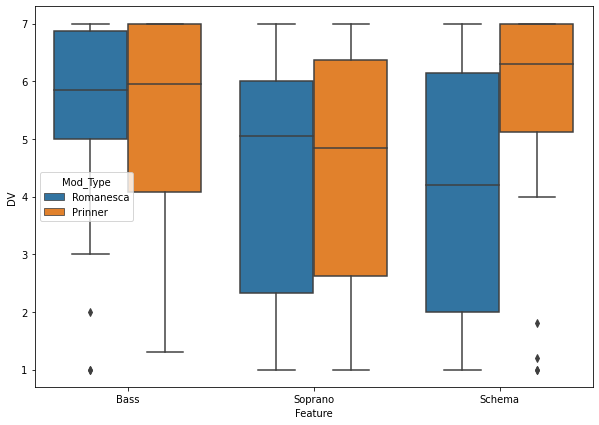

In [23]:
plt.figure(figsize=(10,7))
sns.boxplot(data=df_DV1_long, x='Feature', y='DV', hue='Mod_Type')

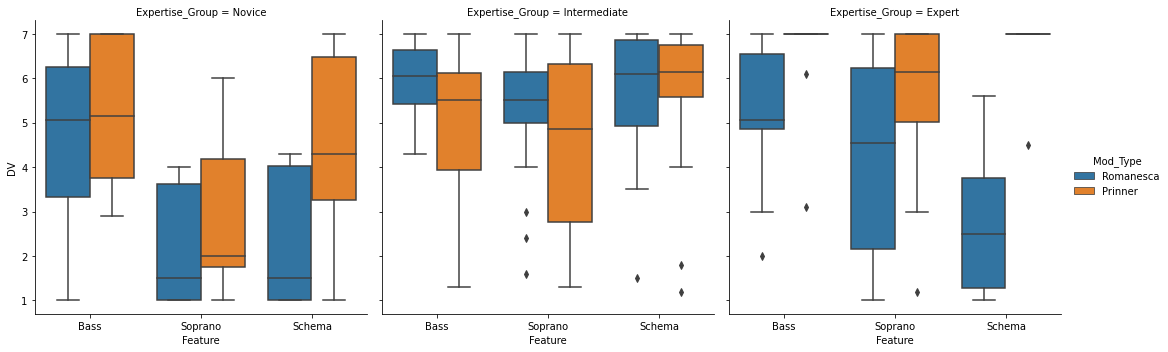

In [24]:
sns.catplot(data=df_DV1_long, x='Feature', y="DV", hue="Mod_Type", kind='box', col='Expertise_Group')

<Figure size 720x504 with 0 Axes>

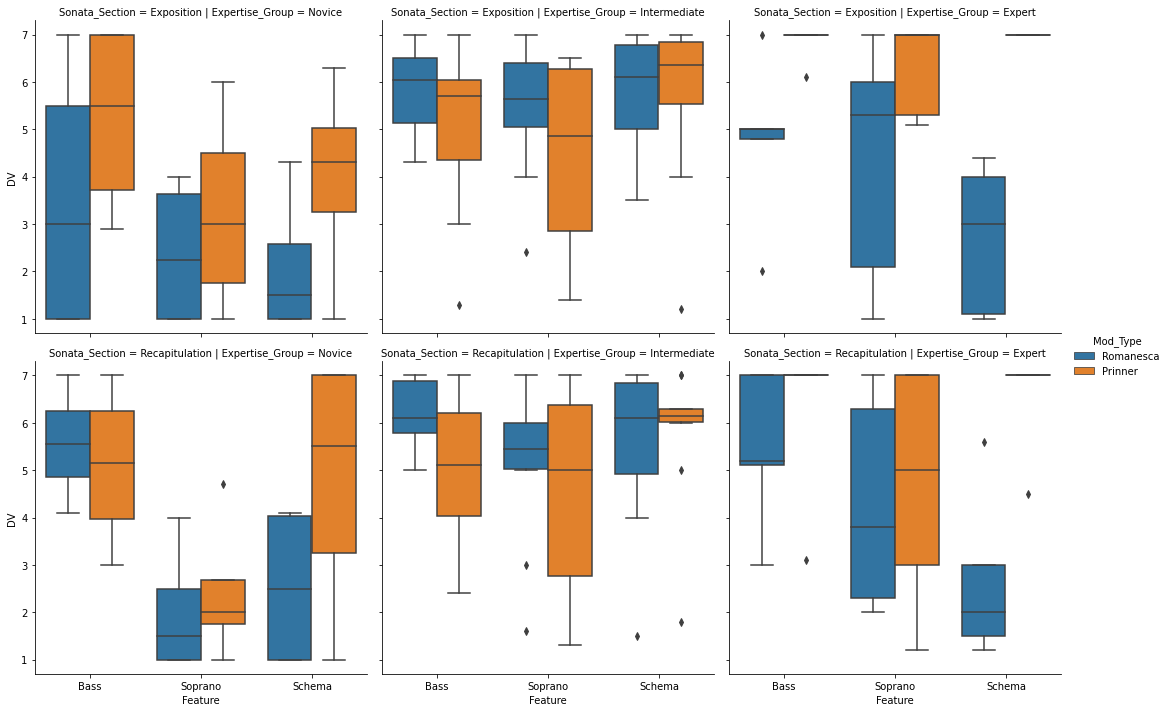

In [25]:
plt.figure(figsize=(10,7))
sns.catplot(data=df_DV1_long, x='Feature', y='DV', hue='Mod_Type', kind='box', col='Expertise_Group', row="Sonata_Section")


<AxesSubplot:xlabel='Feature', ylabel='DV2'>

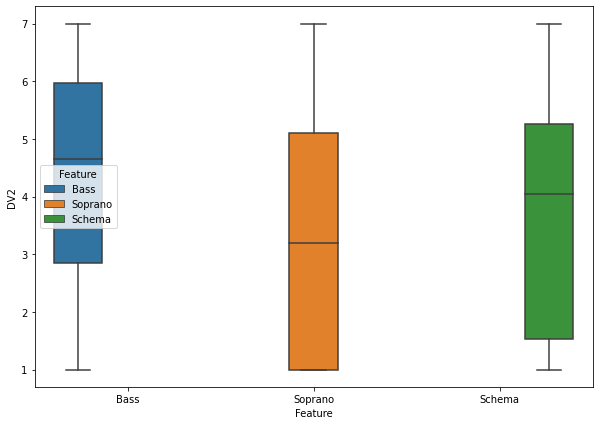

In [26]:
plt.figure(figsize=(10,7))
sns.boxplot(data=df_DV2_long, x='Feature', y='DV2', hue='Feature')


<AxesSubplot:xlabel='Sonata_Section', ylabel='DV2'>

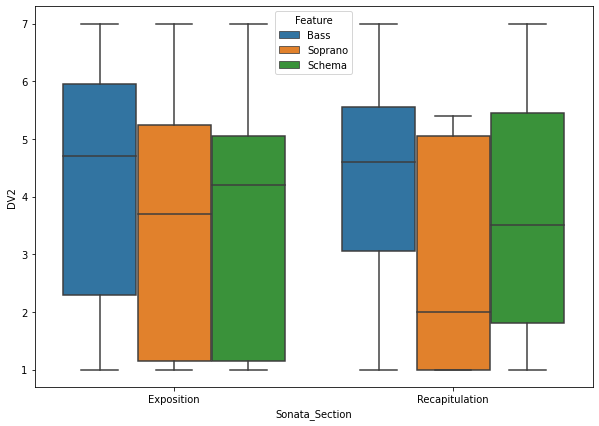

In [27]:
plt.figure(figsize=(10,7))
sns.boxplot(data=df_DV2_long, x='Sonata_Section', y='DV2', hue='Feature')


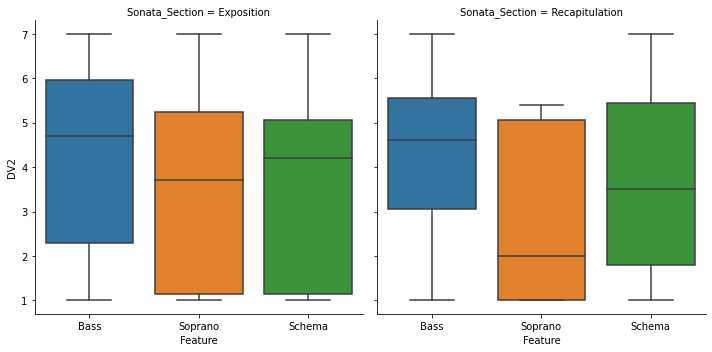

In [28]:
sns.catplot(data=df_DV2_long, x='Feature', y='DV2', kind='box', col='Sonata_Section')

**Visualizing DV1 Distributions**

In [29]:
df_DV1_long.head()

,Random_IDs,Sonata_Section,Feature,Mod_Type,DV,Education_Level,Years_Theory,Years_Skills,Schemata_Expertise,Excerpt_Familiarity,...,Expertise_Group_solf,Sonata_Order,Expo_Order,Expo_Bass_Order,Expo_Sop_Order,Expo_Schema_Order,Recap_Order,Recap_Bass_Order,Recap_Sop_Order,Recap_Schema_Order
Index,,,,,,,,,,,,,,,,,,,,,
0,913,Exposition,Bass,Romanesca,7.0,Professor,10 + years,10 + years,Completely unfamiliar,I have heard this before,...,Expert,2,5,1,1,2,3,1,1,2
1,834,Exposition,Bass,Romanesca,5.1,Graduate Student,5-10 years,5-10 years,Familiar,This was the first time I have heard this,...,Intermediate,1,3,2,2,2,1,2,2,1
2,719,Exposition,Bass,Romanesca,6.5,Graduate Student,1-2 years,3-5 years,Somewhat familiar,I have heard this before,...,Intermediate,2,3,2,2,1,6,2,1,1
3,862,Exposition,Bass,Romanesca,4.6,Graduate Student,5-10 years,5-10 years,Very familiar,This was the first time I have heard this,...,Intermediate,1,3,1,1,1,3,1,2,2
4,686,Exposition,Bass,Romanesca,7.0,Professor,10 + years,10 + years,Very familiar,This was the first time I have heard this,...,Expert,2,1,2,1,1,4,1,1,1


### a. Outliers

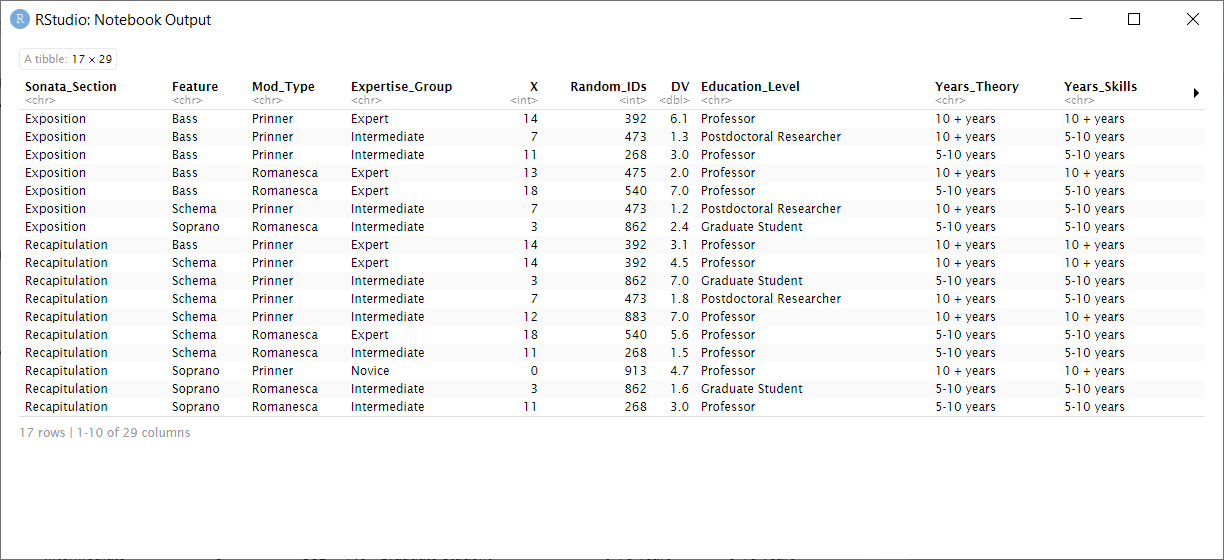

The participants containing outliers occured at index 14, 7, 11, 13, 18, 3, 12 and 0.

In [30]:
outliers = df_DV1_long.loc[[14, 7, 11, 13, 18, 3, 12, 0], :]

outliers

,Random_IDs,Sonata_Section,Feature,Mod_Type,DV,Education_Level,Years_Theory,Years_Skills,Schemata_Expertise,Excerpt_Familiarity,...,Expertise_Group_solf,Sonata_Order,Expo_Order,Expo_Bass_Order,Expo_Sop_Order,Expo_Schema_Order,Recap_Order,Recap_Bass_Order,Recap_Sop_Order,Recap_Schema_Order
Index,,,,,,,,,,,,,,,,,,,,,
14,392,Exposition,Bass,Romanesca,5.0,Professor,10 + years,10 + years,"I am an expert (analysis, playing, composition...",I have heard this before,...,Expert,1,1,1,2,2,1,1,2,2
14,392,Exposition,Bass,Prinner,6.1,Professor,10 + years,10 + years,"I am an expert (analysis, playing, composition...",I have heard this before,...,Expert,1,1,1,2,2,1,1,2,2
14,392,Exposition,Soprano,Romanesca,5.3,Professor,10 + years,10 + years,"I am an expert (analysis, playing, composition...",I have heard this before,...,Expert,1,1,1,2,2,1,1,2,2
14,392,Exposition,Soprano,Prinner,5.1,Professor,10 + years,10 + years,"I am an expert (analysis, playing, composition...",I have heard this before,...,Expert,1,1,1,2,2,1,1,2,2
14,392,Exposition,Schema,Romanesca,4.4,Professor,10 + years,10 + years,"I am an expert (analysis, playing, composition...",I have heard this before,...,Expert,1,1,1,2,2,1,1,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,913,Recapitulation,Bass,Prinner,7.0,Professor,10 + years,10 + years,Completely unfamiliar,I have heard this before,...,Expert,2,5,1,1,2,3,1,1,2
0,913,Recapitulation,Soprano,Romanesca,1.0,Professor,10 + years,10 + years,Completely unfamiliar,I have heard this before,...,Expert,2,5,1,1,2,3,1,1,2
0,913,Recapitulation,Soprano,Prinner,4.7,Professor,10 + years,10 + years,Completely unfamiliar,I have heard this before,...,Expert,2,5,1,1,2,3,1,1,2


### b. Data Summaries and Pivot Tables

Here I will examine the data summaries and pivot tables for potential main effects, interactions and effect of survey block order on the DV. 

In [31]:
df_DV1_long.describe()

,Random_IDs,DV,Solfege_Hearing,Schema_Hearing,Sonata_Order,Expo_Order,Expo_Bass_Order,Expo_Sop_Order,Expo_Schema_Order,Recap_Order,Recap_Bass_Order,Recap_Sop_Order,Recap_Schema_Order
count,228.000000,228.000000,228.000000,228.000000,228.000000,228.000000,228.000000,228.000000,228.000000,228.000000,228.000000,228.000000,228.000000
mean,591.210526,4.919737,6.068421,4.505263,1.631579,3.105263,1.473684,1.473684,1.421053,3.526316,1.526316,1.421053,1.526316
std,255.110358,1.999979,0.942423,2.042148,0.483438,1.777829,0.500406,0.500406,0.494814,1.605116,0.500406,0.494814,0.500406
min,148.000000,1.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,381.000000,3.650000,5.500000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000
50%,540.000000,5.500000,6.100000,4.900000,2.000000,3.000000,1.000000,1.000000,1.000000,3.000000,2.000000,1.000000,2.000000
75%,862.000000,6.825000,7.000000,6.700000,2.000000,5.000000,2.000000,2.000000,2.000000,5.000000,2.000000,2.000000,2.000000
max,998.000000,7.000000,7.000000,7.000000,2.000000,6.000000,2.000000,2.000000,2.000000,6.000000,2.000000,2.000000,2.000000


##### i. Main Effects

**Sonata Section**

From this summary, it does not appear as if there will be a main effect of sonata section on DV1 as the mean and standard deviations (Mexpo = 4.47 sd = 2.3, Mrecap = 4.9 sd = 2.0) are vastly different. 

In [32]:
# No main effect of sonata section

Table_Sonata_Section_DV1 = pd.pivot_table(data=df_DV1_long, index=['Sonata_Section'], values='DV',aggfunc=['mean','std'])

Table_Sonata_Section_DV1

,mean,std
,DV,DV
Sonata_Section,,
Exposition,4.934211,1.999417
Recapitulation,4.905263,2.009264


In [33]:
Plot_T1 = Table_Sonata_Section_DV1.reset_index(col_level=1)

Plot_T1.droplevel(0, axis=1)

Plot_T1.columns = ["Sonata Section", 'DV (Mean)', 'std']

Plot_T1

,Sonata Section,DV (Mean),std
0,Exposition,4.934211,1.999417
1,Recapitulation,4.905263,2.009264


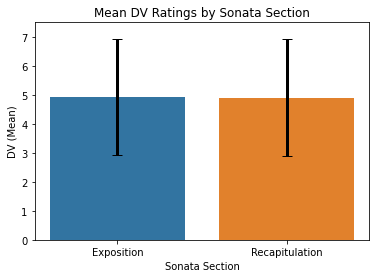

In [34]:
ax1 = sns.barplot(data=Plot_T1, x='Sonata Section', y='DV (Mean)')

plt.ylim(top=7.5)
rcParams['figure.figsize'] = 15, 8

ax1.errorbar(data=Plot_T1, x='Sonata Section', y='DV (Mean)', yerr='std', ls='', lw=3, color='black', capsize=5)
plt.title(label="Mean DV Ratings by Sonata Section")
plt.show()

**Feature**

This shows that there may be a main effect of feature: it appeas especially that bass (M = 5.44, sd = 1.62) and soprano (M = 4.38, sd = 2.08) lines differ. 

In [35]:
#may be a main effect of feature, soprano interpretations are far more difficult

Table_Feature_DV1 =  pd.pivot_table(data=df_DV1_long, index=['Feature'], values='DV',aggfunc=['mean','std'])

Table_Feature_DV1

,mean,std
,DV,DV
Feature,,
Bass,5.447368,1.623287
Schema,4.928947,2.136528
Soprano,4.382895,2.081435


In [36]:
Plot_T2 = Table_Feature_DV1.reset_index(col_level=1)

Plot_T2.droplevel(0, axis=1)

Plot_T2.columns = ["Feature", 'DV (Mean)', 'std']

Plot_T2

,Feature,DV (Mean),std
0,Bass,5.447368,1.623287
1,Schema,4.928947,2.136528
2,Soprano,4.382895,2.081435


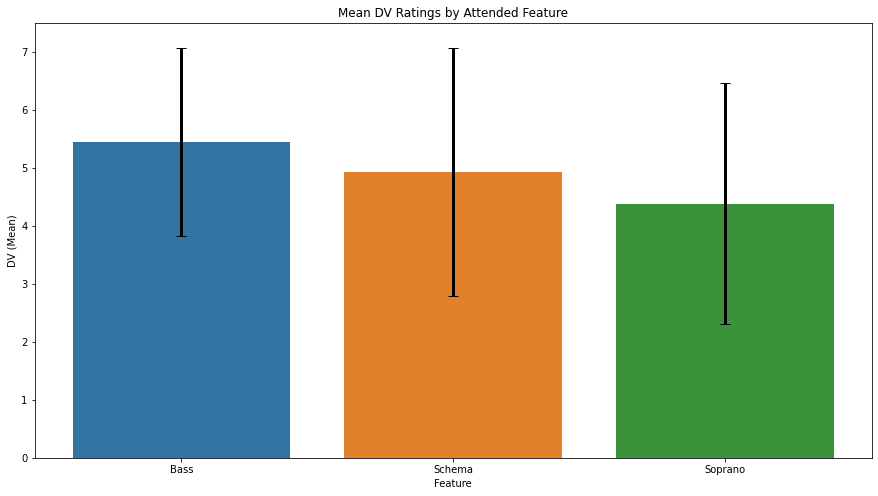

In [37]:
ax2 = sns.barplot(data=Plot_T2, x='Feature', y='DV (Mean)')

plt.ylim(top=7.5)
rcParams['figure.figsize'] = 15, 5

ax2.errorbar(data=Plot_T2, x='Feature', y='DV (Mean)', yerr='std', ls='', lw=3, color='black', capsize=5)
plt.title(label="Mean DV Ratings by Attended Feature")
plt.show()

**Modulation Type**

Appears that there may indeed be a main effect of modulation type, with modulating (Prinner) interpretations (M = 5.18, sd = 1.95) were rated as easier to hear than nonmodulating (Romanesca) interpretations (M = 4.65, sd = 2.02).

In [38]:
# Effect of mod type? Prinner easier to hear than Romanesca

Table_Schema_DV1 = pd.pivot_table(data=df_DV1_long, index=['Mod_Type'], values='DV',aggfunc=['mean','std'])

Table_Schema_DV1

,mean,std
,DV,DV
Mod_Type,,
Prinner,5.182456,1.949506
Romanesca,4.657018,2.023708


In [39]:
Plot_T3 = Table_Schema_DV1.reset_index(col_level=1)

Plot_T3.droplevel(0, axis=1)

Plot_T3.columns = ["Modulation Type", 'DV (Mean)', 'std']

Plot_T3

,Modulation Type,DV (Mean),std
0,Prinner,5.182456,1.949506
1,Romanesca,4.657018,2.023708


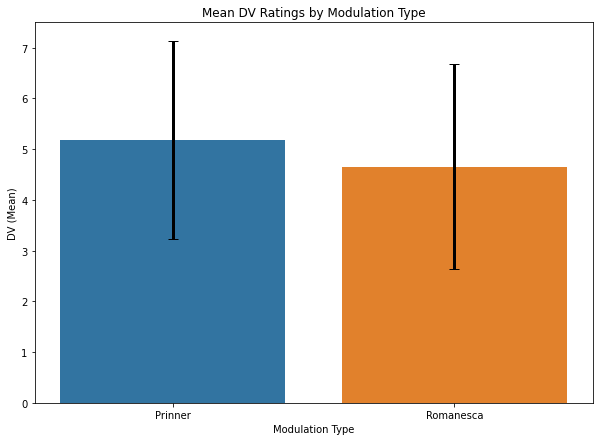

In [116]:
plt.figure(figsize=(10,7))
ax3 = sns.barplot(data=Plot_T3, x='Modulation Type', y='DV (Mean)')

plt.ylim(top=7.5)


ax3.errorbar(data=Plot_T3, x='Modulation Type', y='DV (Mean)', yerr='std', ls='', lw=3, color='black', capsize=5)
plt.title(label="Mean DV Ratings by Modulation Type")
plt.show()

**Between Subject Factor: Expertise Group**

Here, we can see that there is likely an effect of expertise group on ease of hearing ratings. Intermediates have the highest ease of hearing ratings (M = 5.35, sd = 1.6), while novices have the lowest (M = 3.56, sd = 2.17), and experts slightly lower than intermediates (M = 5.13, sd = 2.12).

In [41]:
Expertise_Table_DV1 = pd.pivot_table(data=df_DV1_long, index=['Expertise_Group'], values='DV',aggfunc=['mean','std'])

Expertise_Table_DV1

,mean,std
,DV,DV
Expertise_Group,,
Expert,5.133333,2.120015
Intermediate,5.356667,1.602872
Novice,3.560417,2.176933


##### ii. Two-Way Interactions

**Sonata Section by Attended Feature**

Here we see there may be an interaction between sonata section and feature stemming primarily from the larger difference between bass (M = 5.59, sd = 1.44) and soprano (M = 4.17, sd = 2.13) features in the recapitulation comapared to the exposition (Mbass = 5.3, sd = 1.79, Msop = 4.59, sd = 2.03).

In [42]:
#Probably no two way interaction of Sonata_Section and Feature

Table_Sect_Feat_DV1 = pd.pivot_table(data=df_DV1_long, index=['Sonata_Section','Feature'], values="DV", aggfunc=['mean','std'])

Table_Sect_Feat_DV1

mean       std
                              DV        DV
Sonata_Section Feature                    
Exposition     Bass     5.300000  1.793080
               Schema   4.907895  2.148083
               Soprano  4.594737  2.030570
Recapitulation Bass     5.594737  1.442773
               Schema   4.950000  2.153533
               Soprano  4.171053  2.136922

In [43]:
Plot_T4 = Table_Sect_Feat_DV1.reset_index(col_level=1)

Plot_T4.droplevel(0, axis=1)

Plot_T4.columns = ["Sonata Section", "Feature", 'DV (Mean)', 'std']

Plot_T4

,Sonata Section,Feature,DV (Mean),std
0,Exposition,Bass,5.300000,1.793080
1,Exposition,Schema,4.907895,2.148083
2,Exposition,Soprano,4.594737,2.030570
3,Recapitulation,Bass,5.594737,1.442773
4,Recapitulation,Schema,4.950000,2.153533
5,Recapitulation,Soprano,4.171053,2.136922


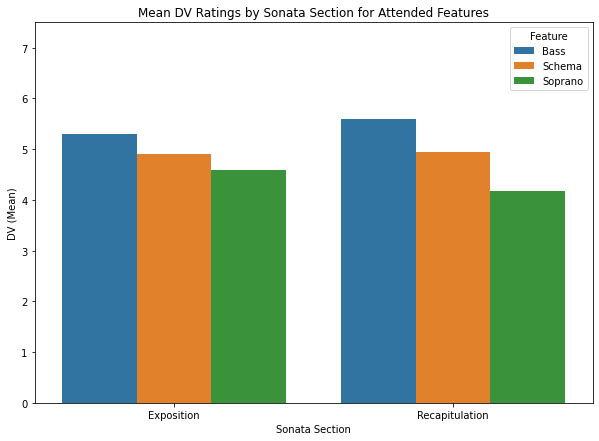

In [117]:
plt.figure(figsize=(10,7))

sd= Plot_T4.iloc[:, 3]

ax4 = sns.barplot(data=Plot_T4, x='Sonata Section', y='DV (Mean)', hue='Feature')

plt.ylim(top=7.5)

plt.title(label="Mean DV Ratings by Sonata Section for Attended Features")
plt.show()

**Sonata Section and Modulation Type**

There also may be an interaction effect between sonata section and modulation type as Prinner (M = 5.3, sd = 1.89) and Romanesca (M = 4.56, sd = 2.05) are more differentiated in the exposition compared to the recapitulation where these differences are smaller (MPrin = 5.06, sd = 2.01, MRom = 4.75, sd = 2.00).

In [46]:
# No interaction of Sonata Section and Modulation Type

Table_Sect_Mod_DV1 = pd.pivot_table(data=df_DV1_long, index=['Sonata_Section','Mod_Type'], values="DV", aggfunc=('mean', 'std'))

Table_Sect_Mod_DV1

mean       std
Sonata_Section Mod_Type                     
Exposition     Prinner    5.300000  1.891050
               Romanesca  4.568421  2.053843
Recapitulation Prinner    5.064912  2.016139
               Romanesca  4.745614  2.007403

In [47]:
Plot_T5 = Table_Sect_Mod_DV1.reset_index(col_level=1)


Plot_T5.columns = ["Sonata Section", "Modulation Type", 'DV (Mean)', 'std']

Plot_T5

,Sonata Section,Modulation Type,DV (Mean),std
0,Exposition,Prinner,5.300000,1.891050
1,Exposition,Romanesca,4.568421,2.053843
2,Recapitulation,Prinner,5.064912,2.016139
3,Recapitulation,Romanesca,4.745614,2.007403


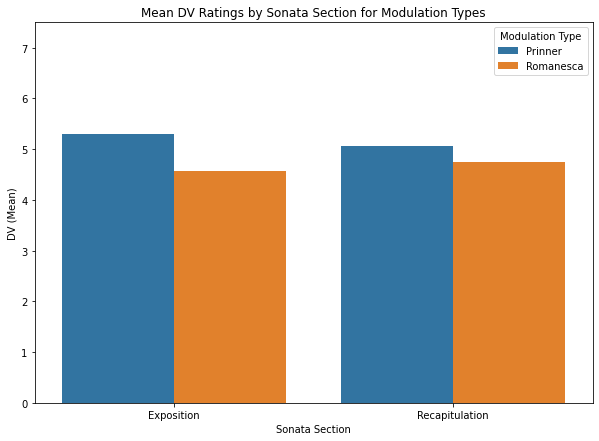

In [118]:
plt.figure(figsize=(10,7))
ax5 = sns.barplot(data=Plot_T5, x='Sonata Section', y='DV (Mean)', hue='Modulation Type')

plt.ylim(top=7.5)

plt.title(label="Mean DV Ratings by Sonata Section for Modulation Types")
plt.show()

**Feature and Modulation Type**

There may be an interaction of feature and modulation type as the ratings for Prinner (M = 5.70, sd = 1.81) and Romanesca (4.15, sd = 2.17) differ in the schema attending condition compared to the bass and soprano attending conditions where Prinner and Romanesca interpretations are nearly identical. 

In [49]:
# May be a two-way interaction between feature and modulation type, bass and schema attending features have opposite trend

Table_Feat_Mod_DV1 = pd.pivot_table(data=df_DV1_long, index=['Feature', 'Mod_Type'], values="DV", aggfunc=['mean','std'])

Table_Feat_Mod_DV1

mean       std
                         DV        DV
Feature Mod_Type                     
Bass    Prinner    5.434211  1.683991
        Romanesca  5.460526  1.582769
Schema  Prinner    5.705263  1.815838
        Romanesca  4.152632  2.172026
Soprano Prinner    4.407895  2.124170
        Romanesca  4.357895  2.066023

In [50]:
Plot_T6 = Table_Feat_Mod_DV1.reset_index(col_level=1)


Plot_T6.columns = ["Feature", "Modulation Type", 'DV (Mean)', 'std']

Plot_T6

,Feature,Modulation Type,DV (Mean),std
0,Bass,Prinner,5.434211,1.683991
1,Bass,Romanesca,5.460526,1.582769
2,Schema,Prinner,5.705263,1.815838
3,Schema,Romanesca,4.152632,2.172026
4,Soprano,Prinner,4.407895,2.124170
5,Soprano,Romanesca,4.357895,2.066023


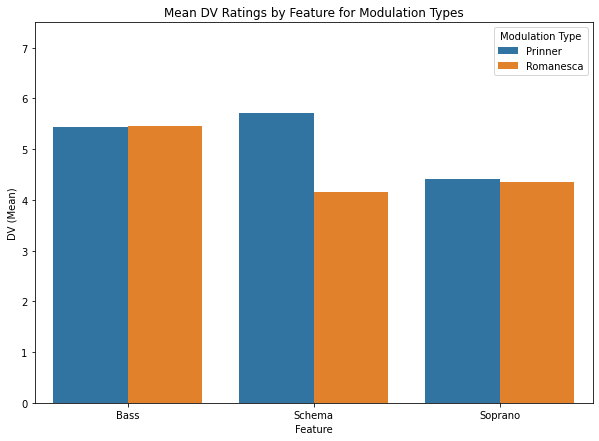

In [119]:
plt.figure(figsize=(10,7))
ax6 = sns.barplot(data=Plot_T6, x='Feature', y='DV (Mean)', hue='Modulation Type')

plt.ylim(top=7.5)

plt.title(label="Mean DV Ratings by Feature for Modulation Types")
plt.show()

##### Three Way Interaction

There may be, but it is unlikely, a three way interaction between sonata sectin, feature and modulation type, as the trend for modulation type (Prinner higher, Romanesca lower) is reversed (Romanesca higher, Prinner lower) in the recapitulation only. This makes sense as the recapitulation is typically interpreted by modern listeners as nonmodulatory, so the nonmodulating interpretation being easier to hear here makes sense.

In [52]:


Table_All_DV1 = pd.pivot_table(data=df_DV1_long, index=['Sonata_Section','Feature', 'Mod_Type'], values="DV", aggfunc=['mean','std'])

Table_All_DV1

mean       std
                                        DV        DV
Sonata_Section Feature Mod_Type                     
Exposition     Bass    Prinner    5.542105  1.705324
                       Romanesca  5.057895  1.891300
               Schema  Prinner    5.657895  1.899507
                       Romanesca  4.157895  2.165465
               Soprano Prinner    4.700000  2.008039
                       Romanesca  4.489474  2.102352
Recapitulation Bass    Prinner    5.326316  1.701908
                       Romanesca  5.863158  1.109159
               Schema  Prinner    5.752632  1.779004
                       Romanesca  4.147368  2.237898
               Soprano Prinner    4.115789  2.250003
                       Romanesca  4.226316  2.077884

In [53]:
Plot_T7 = Table_All_DV1.reset_index(col_level=1)


Plot_T7.columns = ["Sonata Section", "Feature", "Modulation Type", 'DV (Mean)', 'std']

Plot_T7

,Sonata Section,Feature,Modulation Type,DV (Mean),std
0,Exposition,Bass,Prinner,5.542105,1.705324
1,Exposition,Bass,Romanesca,5.057895,1.891300
2,Exposition,Schema,Prinner,5.657895,1.899507
3,Exposition,Schema,Romanesca,4.157895,2.165465
4,Exposition,Soprano,Prinner,4.700000,2.008039
5,Exposition,Soprano,Romanesca,4.489474,2.102352
6,Recapitulation,Bass,Prinner,5.326316,1.701908
7,Recapitulation,Bass,Romanesca,5.863158,1.109159
8,Recapitulation,Schema,Prinner,5.752632,1.779004
9,Recapitulation,Schema,Romanesca,4.147368,2.237898


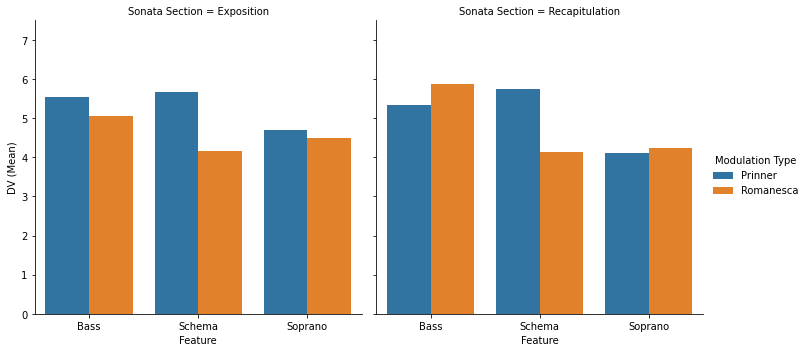

In [54]:
ax7 = sns.catplot(data=Plot_T7, x='Feature', y='DV (Mean)', hue='Modulation Type', col='Sonata Section', kind='bar')

plt.ylim(top=7.5)

plt.show()

#### iii. Effects of Order

I will now examine the effects of order of presentation on the first dependent variable.

In [55]:
df_DV1_long.shape

(228, 26)

In [56]:
(df_DV1_long.Sonata_Order.value_counts())/12

2    12.0
1     7.0
Name: Sonata_Order, dtype: float64

In [57]:
#Seems to be an effect of order! Order 1 = EXPO then RECAP, Order 2 = RECAP then EXPO

Table_OrderAll_DV1 = pd.pivot_table(data=df_DV1_long, index=['Sonata_Order','Sonata_Section','Feature', 'Mod_Type'], values="DV", aggfunc=['mean','std'])

Table_OrderAll_DV1


mean       std
                                                     DV        DV
Sonata_Order Sonata_Section Feature Mod_Type                     
1            Exposition     Bass    Prinner    5.914286  1.030257
                                    Romanesca  4.571429  1.796955
                            Schema  Prinner    5.742857  1.463850
                                    Romanesca  4.371429  2.161569
                            Soprano Prinner    3.928571  1.817245
                                    Romanesca  4.214286  1.872101
             Recapitulation Bass    Prinner    4.757143  1.703777
                                    Romanesca  5.842857  0.888552
                            Schema  Prinner    5.971429  1.247283
                                    Romanesca  4.557143  2.087947
                            Soprano Prinner    3.657143  2.355035
                                    Romanesca  4.042857  2.160137
2            Exposition     Bass    Prinner    5.325000  2.010032
                                    Romanesca  5.341667  1.963049
                            Schema  Prinner    5.608333  2.174421
                                    Romanesca  4.033333  2.253617
                            Soprano Prinner    5.150000  2.048725
                                    Romanesca  4.650000  2.290097
             Recapitulation Bass    Prinner    5.658333  1.682238
                                    Romanesca  5.875000  1.257794
                            Schema  Prinner    5.625000  2.069310
                                    Romanesca  3.908333  2.376574
                            Soprano Prinner    4.383333  2.246546
                                    Romanesca  4.333333  2.118032

In [58]:
Plot_T8 = Table_OrderAll_DV1.reset_index(col_level=1)


Plot_T8.columns = ['Sonata Order', "Sonata Section", "Feature", "Modulation Type", 'DV (Mean)', 'std']

Plot_T8

,Sonata Order,Sonata Section,Feature,Modulation Type,DV (Mean),std
0,1,Exposition,Bass,Prinner,5.914286,1.030257
1,1,Exposition,Bass,Romanesca,4.571429,1.796955
2,1,Exposition,Schema,Prinner,5.742857,1.463850
3,1,Exposition,Schema,Romanesca,4.371429,2.161569
4,1,Exposition,Soprano,Prinner,3.928571,1.817245
5,1,Exposition,Soprano,Romanesca,4.214286,1.872101
6,1,Recapitulation,Bass,Prinner,4.757143,1.703777
7,1,Recapitulation,Bass,Romanesca,5.842857,0.888552
8,1,Recapitulation,Schema,Prinner,5.971429,1.247283
9,1,Recapitulation,Schema,Romanesca,4.557143,2.087947


Seems to be an effect of order, particularly on schema perception interacting with Sonata Section. When presented in the original order 1 (Expo/Recap), the interaction between feature and modulation type appears to act as predicted (with bassline Prinner interpretation higher in exposition, and lower in the recapitulation). However, when the sonata sections are presented in the opposite order (recap, expo), then the Prinner and Romanesca interpretations are much more equal across the exposition and recap in the bass line feature condition. 

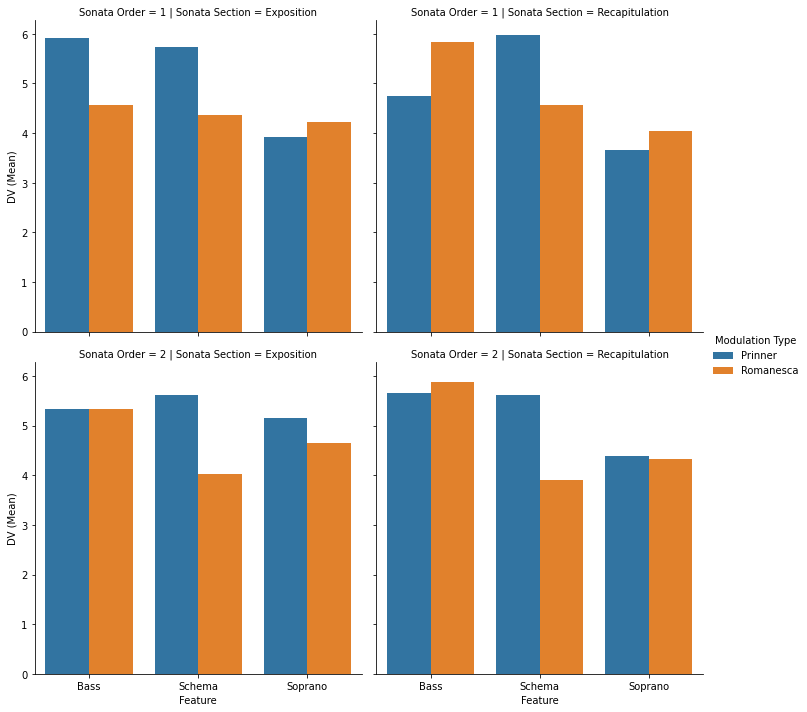

In [59]:
sns.catplot(data=Plot_T8, x="Feature", y="DV (Mean)", hue='Modulation Type', col='Sonata Section', row='Sonata Order', kind='bar')

Here is another visualization for same information:

In [63]:
Table_Order_DV1_2 = pd.pivot_table(data=df_DV1_long, index=['Sonata_Order','Sonata_Section', 'Feature'], values="DV", aggfunc=['mean','std'])

Table_Order_DV1_2


mean       std
                                           DV        DV
Sonata_Order Sonata_Section Feature                    
1            Exposition     Bass     5.242857  1.570259
                            Schema   5.057143  1.910986
                            Soprano  4.071429  1.778689
             Recapitulation Bass     5.300000  1.421808
                            Schema   5.264286  1.807934
                            Soprano  3.850000  2.180243
2            Exposition     Bass     5.333333  1.943029
                            Schema   4.820833  2.310276
                            Soprano  4.900000  2.140297
             Recapitulation Bass     5.766667  1.456818
                            Schema   4.766667  2.349036
                            Soprano  4.358333  2.135399

In [64]:
Plot_T10 = Table_Order_DV1_2.reset_index(col_level=1)

Plot_T10.columns = ['Sonata Order', "Sonata Section", "Feature", 'DV (Mean)', 'std']

Plot_T10

,Sonata Order,Sonata Section,Feature,DV (Mean),std
0,1,Exposition,Bass,5.242857,1.570259
1,1,Exposition,Schema,5.057143,1.910986
2,1,Exposition,Soprano,4.071429,1.778689
3,1,Recapitulation,Bass,5.300000,1.421808
4,1,Recapitulation,Schema,5.264286,1.807934
5,1,Recapitulation,Soprano,3.850000,2.180243
6,2,Exposition,Bass,5.333333,1.943029
7,2,Exposition,Schema,4.820833,2.310276
8,2,Exposition,Soprano,4.900000,2.140297
9,2,Recapitulation,Bass,5.766667,1.456818


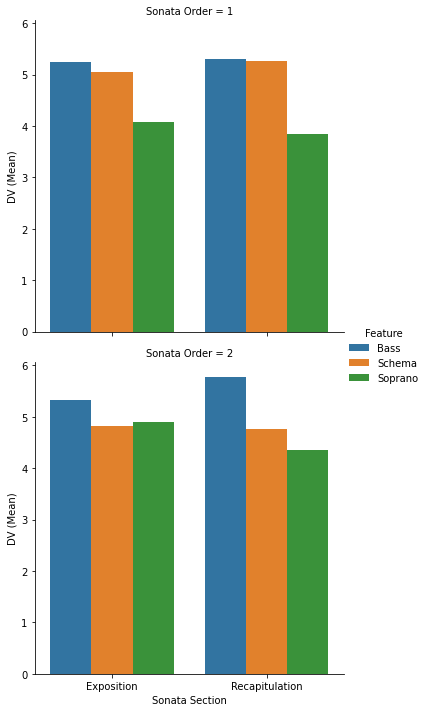

In [65]:
sns.catplot(data=Plot_T10, x="Sonata Section", y="DV (Mean)", hue='Feature',
            row='Sonata Order', kind='bar')

In [66]:
Table_Order_DV1_3 = pd.pivot_table(data=df_DV1_long, index=['Sonata_Order', 'Feature', 'Mod_Type'], values="DV", aggfunc=['mean','std'])

Table_Order_DV1_3

mean       std
                                      DV        DV
Sonata_Order Feature Mod_Type                     
1            Bass    Prinner    5.335714  1.479921
                     Romanesca  5.207143  1.513256
             Schema  Prinner    5.857143  1.311907
                     Romanesca  4.464286  2.043981
             Soprano Prinner    3.792857  2.025782
                     Romanesca  4.128571  1.943996
2            Bass    Prinner    5.491667  1.820635
                     Romanesca  5.608333  1.635188
             Schema  Prinner    5.616667  2.075879
                     Romanesca  3.970833  2.265906
             Soprano Prinner    4.766667  2.138806
                     Romanesca  4.491667  2.163314

In [67]:
Plot_T11 = Table_Order_DV1_3.reset_index(col_level=1)

Plot_T11.columns = ['Sonata Order', "Feature", "Modulation Type", 'DV (Mean)', 'std']

Plot_T11

,Sonata Order,Feature,Modulation Type,DV (Mean),std
0,1,Bass,Prinner,5.335714,1.479921
1,1,Bass,Romanesca,5.207143,1.513256
2,1,Schema,Prinner,5.857143,1.311907
3,1,Schema,Romanesca,4.464286,2.043981
4,1,Soprano,Prinner,3.792857,2.025782
5,1,Soprano,Romanesca,4.128571,1.943996
6,2,Bass,Prinner,5.491667,1.820635
7,2,Bass,Romanesca,5.608333,1.635188
8,2,Schema,Prinner,5.616667,2.075879
9,2,Schema,Romanesca,3.970833,2.265906


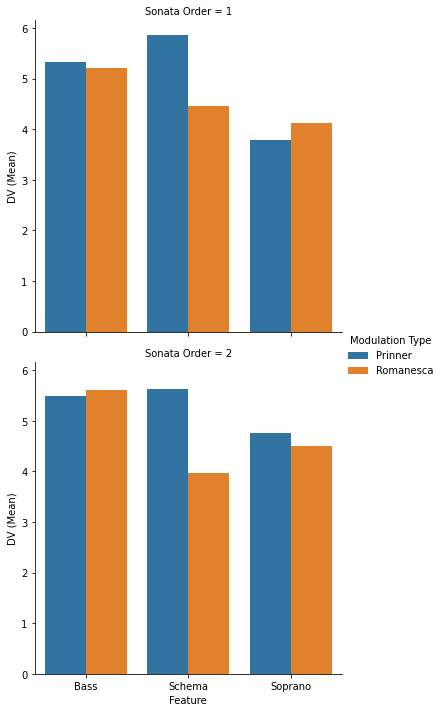

In [68]:
sns.catplot(data=Plot_T11, x='Feature', y="DV (Mean)", hue='Modulation Type',
            row='Sonata Order', kind='bar')

In [69]:
df_DV1_long.columns

Index(['Random_IDs', 'Sonata_Section', 'Feature', 'Mod_Type', 'DV',
       'Education_Level', 'Years_Theory', 'Years_Skills', 'Schemata_Expertise',
       'Excerpt_Familiarity', 'Excerpt_Analysis', 'Solfege_Hearing',
       'Schema_Hearing', 'Perfect_Pitch?', 'Interpretation_App',
       'Expertise_Group', 'Expertise_Group_solf', 'Sonata_Order', 'Expo_Order',
       'Expo_Bass_Order', 'Expo_Sop_Order', 'Expo_Schema_Order', 'Recap_Order',
       'Recap_Bass_Order', 'Recap_Sop_Order', 'Recap_Schema_Order'],
      dtype='object')

## 3. Exploratory Analysis: DV2 (ease of change)

Here I examine the potential main effects and interactions for the second dependent variable, DV2, ease of change ratings. 

### a. Outliers<a id = 'O2'></a>

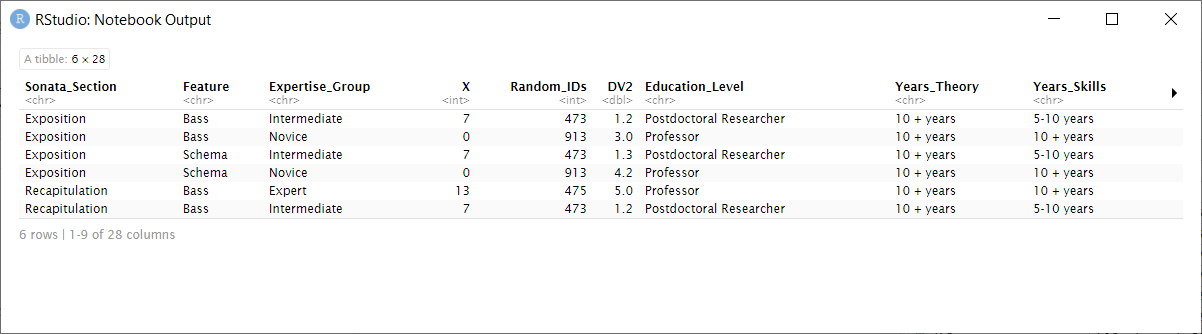

### b. Data Summaries and Pivot Tables<a id = 'DS2'></a>

##### i. Main Effects<a id = 'DS1i'></a>

**Sonata Section** 

There does not appear to be a main effect of sonata section on DV2.

In [77]:
#ease of change ratings are nearly equal, but low across sonata section types. No main effect of section is likely. 

Table_Sonata_DV2 = pd.pivot_table(data=df_DV2_long, index=['Sonata_Section'], values="DV2", aggfunc=['mean','std'])

Table_Sonata_DV2

,mean,std
,DV2,DV2
Sonata_Section,,
Exposition,3.784211,2.145909
Recapitulation,3.570175,1.948164


**Feature**

There may be a main effect of feature, as was the case with DV1, as the bass (M = 4.14, sd = 1.96) and soprano (M = 3.14, sd = 2.01) ratings appear to differ. 

In [78]:
#May be a main effect of feature, soprano lowest ease of change

Table_Feature_DV2 = pd.pivot_table(data=df_DV2_long, index=['Feature'], values="DV2", aggfunc=['mean','std'])

Table_Feature_DV2

,mean,std
,DV2,DV2
Feature,,
Bass,4.144737,1.965472
Schema,3.742105,2.071640
Soprano,3.144737,2.018522


**Sonata Section by Feature**

There may be an interaction between sonata section and feature as the difference between bass (M = 4.21, 1.79) and soprano (M = 2.84, sd = 1.84) is much larger in the recap compared to the exposition. 

In [79]:
# This finding is a bit odd. Despite low ease ratings between schema (Prinner, Romanesca) in the recap in DV1, here the
#exposition ease of change rating is highest for this group. Ease of change may not be reflecting differences in the interpretability
#between modulation types, particpants may have put a high rating if they could somewhat switch between one really convincing hearing
#and one not convincing hearing. I was expecting if Prinner/Romanesca hearing ease was low in DV1, that DV2 would also be low

Table_All_DV2 = pd.pivot_table(data=df_DV2_long, index=['Sonata_Section','Feature'], values="DV2", aggfunc=['mean','std'])

Table_All_DV2

mean       std
                             DV2       DV2
Sonata_Section Feature                    
Exposition     Bass     4.073684  2.166113
               Schema   3.836842  2.147922
               Soprano  3.442105  2.192238
Recapitulation Bass     4.215789  1.799464
               Schema   3.647368  2.046778
               Soprano  2.847368  1.839193

#### ii. Effects of Order<a id = 'DS1ii'></a>

I will now examine effects of trial presentation order. There does not appear to be an effect of order here, so I will not include this analysis subset in my R markdown file. 

In [80]:
Table_OrderALL_DV2 = pd.pivot_table(data=df_DV2_long, index=['Sonata_Order','Sonata_Section','Feature'], values="DV2", aggfunc=['mean','std'])

Table_OrderALL_DV2

mean       std
                                          DV2       DV2
Sonata_Order Sonata_Section Feature                    
1            Exposition     Bass     4.085714  2.451142
                            Schema   3.757143  2.011514
                            Soprano  3.000000  1.686219
             Recapitulation Bass     3.728571  2.011396
                            Schema   3.871429  1.977974
                            Soprano  2.714286  1.879210
2            Exposition     Bass     4.066667  2.097762
                            Schema   3.883333  2.309991
                            Soprano  3.700000  2.473128
             Recapitulation Bass     4.500000  1.689002
                            Schema   3.516667  2.161158
                            Soprano  2.925000  1.895029

In [81]:
Table_Order_DV2_1 = pd.pivot_table(data=df_DV2_long, index=['Sonata_Order','Sonata_Section'], values="DV2", aggfunc=['mean','std'])

Table_Order_DV2_1

mean       std
                                  DV2       DV2
Sonata_Order Sonata_Section                    
1            Exposition      3.614286  2.021456
             Recapitulation  3.438095  1.930149
2            Exposition      3.883333  2.237282
             Recapitulation  3.647222  1.981700

In [82]:
Table_Order_DV2_2 = pd.pivot_table(data=df_DV2_long, index=['Sonata_Order','Feature'], values="DV2", aggfunc=['mean','std'])

Table_Order_DV2_2

mean       std
                           DV2       DV2
Sonata_Order Feature                    
1            Bass     3.907143  2.162073
             Schema   3.814286  1.917473
             Soprano  2.857143  1.721678
2            Bass     4.283333  1.875625
             Schema   3.700000  2.195648
             Soprano  3.312500  2.190754

## 4. Visualizations for RM ANOVA: DV1

Nonsignificant Effects

In [120]:
Table_Sonata_Section_DV1

,mean,std
,DV,DV
Sonata_Section,,
Exposition,4.934211,1.999417
Recapitulation,4.905263,2.009264


Nonsignificant main effect of sonata section, F(1, 16) = 0.004, p = 0.950, Exposition (M = 4.93, sd = 1.99) was equal to recapitulation (M = 4.90, sd = 2.00). 

In [122]:
table1 = pd.pivot_table(data=df_DV1_long, values='DV', index=['Expertise_Group','Sonata_Section'], aggfunc=['mean', 'std'])

table1

mean       std
                                      DV        DV
Expertise_Group Sonata_Section                    
Expert          Exposition      5.306667  2.081103
                Recapitulation  4.960000  2.179624
Intermediate    Exposition      5.361667  1.562060
                Recapitulation  5.351667  1.655857
Novice          Exposition      3.400000  2.192477
                Recapitulation  3.720833  2.196238

Nonsignificant two-way interaction between Expertise group and sonata section, F(2, 16) = 0.858, p = 0.467. All groups had nonsignificant differences between exposition and recapitulation: Expert (Mexpo = 5.30, sd = 2.08 | Mrecap = 4.96, sd = 2.17), Intermediate (Mexpo = 5.36, sd = 1.56 | Mrecap = 5.35, sd = 1.65), Novice (Mexpo = 3.40, sd = 2.19 | Mrecap = 3.72, sd = 2.19)

In [85]:
table2 = pd.pivot_table(data=df_DV1_long, values='DV', index=['Sonata_Section', 'Mod_Type'], aggfunc=['mean', 'std'])

table2

mean       std
                                DV        DV
Sonata_Section Mod_Type                     
Exposition     Prinner    5.300000  1.891050
               Romanesca  4.568421  2.053843
Recapitulation Prinner    5.064912  2.016139
               Romanesca  4.745614  2.007403

Nonsignificant two-way interaction between sonata section and modulation type, F(1, 16) = 3.93, p = 0.065. Both Prinner and Romanesca were equally available in the Exposition (Mprinner = 5.33, sd = 1.89 | Mromanesca = 4.56, sd = 2.05) and Recapitulation (Mprinner = 5.06, sd = 2.01 | Mromanesca = 4.74, sd = 2.00)

In [86]:
table3 = pd.pivot_table(data=df_DV1_long, values='DV', index=['Expertise_Group', 'Sonata_Section', 'Feature'], aggfunc=['mean', 'std'])

table3

mean       std
                                            DV        DV
Expertise_Group Sonata_Section Feature                  
Expert          Exposition     Bass     5.7900  1.633299
                               Schema   4.8500  2.502110
                               Soprano  5.2800  2.129580
                Recapitulation Bass     5.8400  1.653414
                               Schema   4.5800  2.461616
                               Soprano  4.4600  2.283856
Intermediate    Exposition     Bass     5.4300  1.433105
                               Schema   5.6900  1.532422
                               Soprano  4.9650  1.700240
                Recapitulation Bass     5.5850  1.388780
                               Schema   5.6600  1.587252
                               Soprano  4.8100  1.897339
Novice          Exposition     Bass     4.3625  2.567899
                               Schema   3.0250  2.040133
                               Soprano  2.8125  1.850434
                Recapitulation Bass     5.3125  1.440672
                               Schema   3.6375  2.505957
                               Soprano  2.2125  1.410610

### a. Main Effects<a id = 'RM1a'></a>

**Expertise Group**

RM ANOVA showed a main effect of expertise group F(2, 16) = 6.96, p = 0.007.

Tukey_HSD test revealed that the Expert (M = 5.13, sd = 2.12) and Intermediate (M = 5.35, sd = 1.60) groups differed significantly from the Novice (M = 3.56, sd = 2.17) groups.  

Expert and novice HSD: (p = 0.0001, 95% C.I. = [-2.44, -0.696] <br>
Intermediate and novice HSD: (p < 0.001, 95% C.I. = [-2.55, -1.04]


In [87]:
Expertise_Table_DV1

,mean,std
,DV,DV
Expertise_Group,,
Expert,5.133333,2.120015
Intermediate,5.356667,1.602872
Novice,3.560417,2.176933


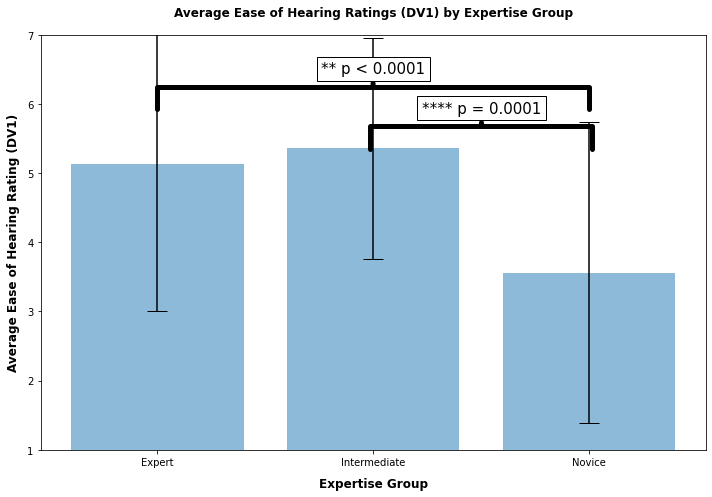

In [123]:
Groups = ["Expert", "Intermediate", 'Novice']
y_vals_ex = Expertise_Table_DV1[('mean', "DV")]
std_ex = Expertise_Table_DV1[('std', "DV")]
 
# Figure Size
fig, ax = plt.subplots(figsize =(10, 7))
 
# Horizontal Bar Plot
plt.bar(Groups, y_vals_ex, yerr=std_ex, color='tab:blue', align='center', alpha=0.5, ecolor='black', capsize=10)

ax.set_ylabel('Average Ease of Hearing Rating (DV1)', fontsize=12, labelpad=7, fontweight ='bold')
ax.set_xlabel("Expertise Group", fontsize=12, labelpad=10, fontweight ='bold')
ax.set_title('Average Ease of Hearing Ratings (DV1) by Expertise Group', x=0.5, y=1.03, fontweight ='bold')

ax.set_ylim([1, 7])

#annotations
ax.annotate('** p < 0.0001', xy=(0.5, 0.87), xytext=(0.5, 0.90), xycoords='axes fraction', 
            fontsize=15, ha='center', va='bottom',
            bbox=dict(boxstyle='square', fc='white'),
            arrowprops=dict(arrowstyle='-[, widthB=14.4, lengthB=1.5', facecolor='blue', lw=5.0))

ax.annotate('**** p = 0.0001', xy=(0.663, 0.775), xytext=(0.663, 0.805), xycoords='axes fraction',
            fontsize=15, ha='center', va='bottom',
            bbox=dict(boxstyle='square', fc='white'),
            arrowprops=dict(arrowstyle='-[, widthB=7.4, lengthB=1.5', facecolor='blue', lw=5.0))
# Save
plt.tight_layout()
plt.savefig('Average DV1_Expertise Main.png', format='png', pad_inches=0.5, bbox_inches='tight')

# Show Plot
plt.show()


**Feature**

There was a main effect of feature, F(1.94, 31.11) = 11.88, p < 0.001. Corrected for violation of sphericty violation using GG, ε = 0.910

Post-hoc Tucky HSD showed that this effect comes from a statistically significant difference between the Bass (M = 5.45, sd = 1.65) and Soprano (M = 4.35, sd = 2.12) features, p = 0.003.

Bass and soprano HSD: (p = 0.002, 95% C.I. = [-1.81, -0.314]

In [89]:
Table_Feature_DV1

,mean,std
,DV,DV
Feature,,
Bass,5.447368,1.623287
Schema,4.928947,2.136528
Soprano,4.382895,2.081435


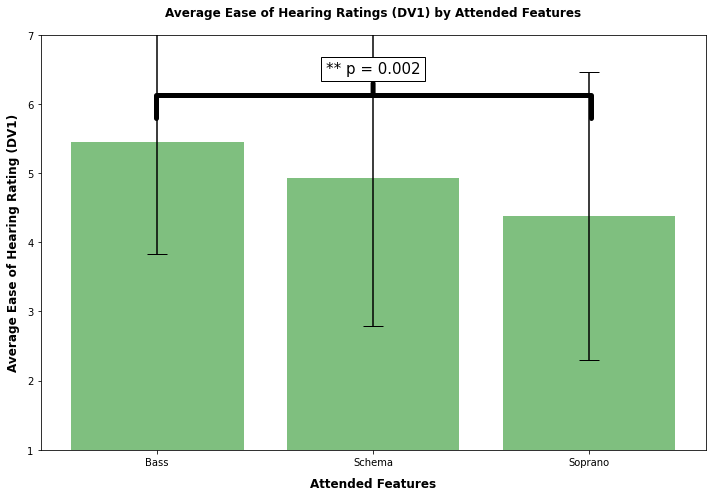

In [124]:
Features = ["Bass", "Schema", "Soprano"]
y_vals_ft = Table_Feature_DV1[('mean', "DV")]
std_ft = Table_Feature_DV1[('std', "DV")]
 
# Figure Size
fig, ax = plt.subplots(figsize =(10, 7))
 
# Horizontal Bar Plot
plt.bar(Features, y_vals_ft, yerr=std_ft, color = 'green', align='center', alpha=0.5, ecolor='black', capsize=10)

ax.set_ylabel('Average Ease of Hearing Rating (DV1)', fontsize=12, labelpad=7, fontweight ='bold')
ax.set_xlabel("Attended Features", fontsize=12, labelpad=10, fontweight ='bold')
ax.set_title('Average Ease of Hearing Ratings (DV1) by Attended Features', x=0.5, y=1.03, fontweight ='bold')

ax.set_ylim([1, 7])
 

#annotations
ax.annotate('** p = 0.002', xy=(0.5, 0.85), xytext=(0.5, 0.9), xycoords='axes fraction', 
            fontsize=15, ha='center', va='bottom',
            bbox=dict(boxstyle='square', fc='white'),
            arrowprops=dict(arrowstyle='-[, widthB=14.5, lengthB=1.5', facecolor='blue', lw=5.0))

#save 
plt.tight_layout()
plt.savefig('Average DV1_Features Main.png', format='png', pad_inches=0.5, bbox_inches='tight')

# Show Plot
plt.show()



In [91]:
df_feature_noschema = df_DV1_long[df_DV1_long['Feature'] != 'Schema']

df_feature_noschema

,Random_IDs,Sonata_Section,Feature,Mod_Type,DV,Education_Level,Years_Theory,Years_Skills,Schemata_Expertise,Excerpt_Familiarity,...,Expertise_Group_solf,Sonata_Order,Expo_Order,Expo_Bass_Order,Expo_Sop_Order,Expo_Schema_Order,Recap_Order,Recap_Bass_Order,Recap_Sop_Order,Recap_Schema_Order
Index,,,,,,,,,,,,,,,,,,,,,
0,913,Exposition,Bass,Romanesca,7.0,Professor,10 + years,10 + years,Completely unfamiliar,I have heard this before,...,Expert,2,5,1,1,2,3,1,1,2
1,834,Exposition,Bass,Romanesca,5.1,Graduate Student,5-10 years,5-10 years,Familiar,This was the first time I have heard this,...,Intermediate,1,3,2,2,2,1,2,2,1
2,719,Exposition,Bass,Romanesca,6.5,Graduate Student,1-2 years,3-5 years,Somewhat familiar,I have heard this before,...,Intermediate,2,3,2,2,1,6,2,1,1
3,862,Exposition,Bass,Romanesca,4.6,Graduate Student,5-10 years,5-10 years,Very familiar,This was the first time I have heard this,...,Intermediate,1,3,1,1,1,3,1,2,2
4,686,Exposition,Bass,Romanesca,7.0,Professor,10 + years,10 + years,Very familiar,This was the first time I have heard this,...,Expert,2,1,2,1,1,4,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15,244,Recapitulation,Soprano,Prinner,1.2,Professor,10 + years,10 + years,"I am an expert (analysis, playing, composition...",I have heard this before,...,Expert,2,1,2,1,1,2,2,2,1
16,148,Recapitulation,Soprano,Prinner,3.0,Professor,10 + years,10 + years,Somewhat familiar,I have heard this before,...,Intermediate,1,5,2,1,1,4,1,1,1
17,701,Recapitulation,Soprano,Prinner,7.0,Graduate Student,10 + years,10 + years,Very familiar,I have heard this before,...,Intermediate,2,3,1,2,2,6,1,2,2


In [92]:
Table_features = pd.pivot_table(data=df_feature_noschema, index=['Feature'], values="DV", aggfunc=['mean','std'] )

Table_features

,mean,std
,DV,DV
Feature,,
Bass,5.447368,1.623287
Soprano,4.382895,2.081435


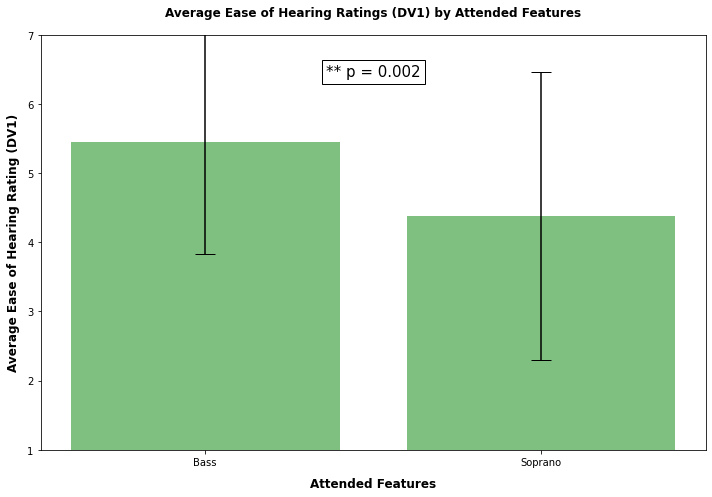

In [125]:
Features2 = ["Bass", "Soprano"]
y_vals_ft2 = Table_features[('mean', "DV")]
std_ft2 = Table_features[('std', "DV")]
 
# Figure Size
fig, ax = plt.subplots(figsize =(10, 7))
 
# Horizontal Bar Plot
plt.bar(Features2, y_vals_ft2, yerr=std_ft2, color = 'green', align='center', alpha=0.5, ecolor='black', capsize=10)

ax.set_ylabel('Average Ease of Hearing Rating (DV1)', fontsize=12, labelpad=7, fontweight ='bold')
ax.set_xlabel("Attended Features", fontsize=12, labelpad=10, fontweight ='bold')
ax.set_title('Average Ease of Hearing Ratings (DV1) by Attended Features', x=0.5, y=1.03, fontweight ='bold')

ax.set_ylim([1, 7])

#annotations
t = ax.text(0.36, 6.4, "** p = 0.002", size=15,  bbox=dict(boxstyle='square', fc='white'))

#save 
plt.tight_layout()
plt.savefig('Average DV1_Features Main_2.png', format='png', pad_inches=0.5, bbox_inches='tight')

# Show Plot
plt.show()



**Modulation Type**

Signficant main effect of mod type, F(1,16)= 4.82, p = 0.043. 

Prinner (M = 5.18, sd = 1.95) higher than Romanesca (M = 4.65, sd = 2.02)

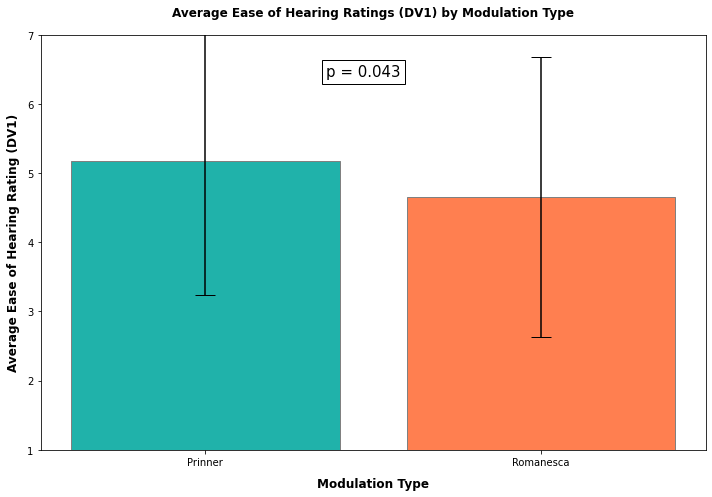

In [127]:
Mods = ["Prinner", "Romanesca"]
mod_vals = Table_Schema_DV1[('mean', "DV")]
mod_std = Table_Schema_DV1[('std', "DV")]
 
# Figure Size
fig, ax = plt.subplots(figsize =(10, 7))
 
# Horizontal Bar Plot
plt.bar(Mods, mod_vals, yerr=mod_std, color = ['lightseagreen', 'coral'], align='center', alpha=1, ecolor='black', capsize=10,
        edgecolor ='grey')

ax.set_ylabel('Average Ease of Hearing Rating (DV1)', fontsize=12, labelpad=7, fontweight ='bold')
ax.set_xlabel("Modulation Type", fontsize=12, labelpad=10, fontweight ='bold')
ax.set_title('Average Ease of Hearing Ratings (DV1) by Modulation Type', x=0.5, y=1.03, fontweight ='bold')

ax.set_ylim([1, 7])

#annotations
t = ax.text(0.36, 6.4, "p = 0.043", size=15,  bbox=dict(boxstyle='square', fc='white'))

#save 
plt.tight_layout()
plt.savefig('Mod_Type_Main.png', format='png', pad_inches=0.5, bbox_inches='tight')

# Show Plot
plt.show()

In [95]:
Table_Schema_DV1

,mean,std
,DV,DV
Mod_Type,,
Prinner,5.182456,1.949506
Romanesca,4.657018,2.023708


### b. Interactions<a id = 'RM1b'></a>

**Expertise Group by Feature**

The RM ANOVA showed an interaction between Expertise Group and Feature, F(3.89, 31.11) = 3.10, p = 0.030. Corrected for violation of sphericity violation using GG, ε = 0.972

Post-hoc Tucky HSD test showed that the Novice group, the Bass (M = 4.83, sd = 2.07) and Soprano (M = 2.51, sd = 1.62) differed significantly from one another (p = 0.005, 95% C.I. = [-4.03, -0.619]

In [129]:
Expert_Feat = pd.pivot_table(data=df_DV1_long, index=["Expertise_Group", 'Feature'], values="DV", aggfunc=['mean','std'])


Expert_Feat

mean       std
                              DV        DV
Expertise_Group Feature                   
Expert          Bass     5.81500  1.599761
                Schema   4.71500  2.419716
                Soprano  4.87000  2.189953
Intermediate    Bass     5.50750  1.395117
                Schema   5.67500  1.540022
                Soprano  4.88750  1.779972
Novice          Bass     4.83750  2.070386
                Schema   3.33125  2.230013
                Soprano  2.51250  1.619413

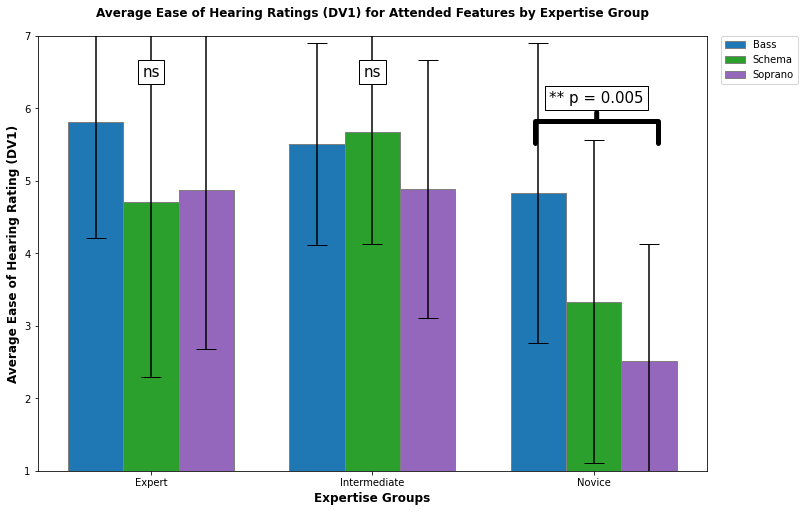

In [130]:
barWidth = 0.25
fig, ax = plt.subplots(figsize =(12, 8))

# set height of bar
bass_ex = Expert_Feat.loc[[('Expert', 'Bass'), ('Intermediate', 'Bass'), ('Novice', 'Bass')], [('mean', "DV")]].squeeze()
schema_ex = Expert_Feat.loc[[('Expert', 'Schema'), ('Intermediate', 'Schema'), ('Novice', 'Schema')], [('mean', "DV")]].squeeze()
sop_ex = Expert_Feat.loc[[('Expert', 'Soprano'), ('Intermediate', 'Soprano'), ('Novice', 'Soprano')], [('mean', "DV")]].squeeze()

#stds
bass_ex_std = Expert_Feat.loc[[('Expert', 'Bass'), ('Intermediate', 'Bass'), ('Novice', 'Bass')], [('std', "DV")]].squeeze()
schema_ex_std = Expert_Feat.loc[[('Expert', 'Schema'), ('Intermediate', 'Schema'), ('Novice', 'Schema')], [('std', "DV")]].squeeze()
sop_ex_std = Expert_Feat.loc[[('Expert', 'Soprano'), ('Intermediate', 'Soprano'), ('Novice', 'Soprano')], [('std', "DV")]].squeeze()

 
# Set position of bar on X axis
br1_ex = np.arange(len(bass_ex))
br2_ex = [x + barWidth for x in br1_ex]
br3_ex = [x + barWidth for x in br2_ex]
 
# Make the plot
plt.bar(br1_ex, bass_ex, yerr=bass_ex_std, ecolor='black', capsize=10, color ='tab:blue', width = barWidth,
        edgecolor ='grey', label ='Bass')
plt.bar(br2_ex, schema_ex, yerr=schema_ex_std, ecolor='black', capsize=10, color ='tab:green', width = barWidth,
        edgecolor ='grey', label ='Schema')
plt.bar(br3_ex, sop_ex, yerr=sop_ex_std, ecolor='black', capsize=10, color ='tab:purple', width = barWidth,
        edgecolor ='grey', label ='Soprano')
 
# Adding Xticks
plt.xlabel('Expertise Groups', fontweight ='bold', fontsize = 12)
plt.ylabel('Average Ease of Hearing Rating (DV1)', fontweight ='bold', fontsize = 12)
plt.xticks([r + barWidth for r in range(len(bass_ex))],
        ['Expert', 'Intermediate', 'Novice'])
ax.set_title('Average Ease of Hearing Ratings (DV1) for Attended Features by Expertise Group', x=0.5, y=1.03, fontweight ='bold')

ax.set_ylim([1, 7])

#annotations 
t1 = ax.text(0.25, 6.5, "ns", ha="center", va="center", size=15,  bbox=dict(boxstyle='square', fc='white'))
t2 = ax.text(1.25, 6.5, "ns", ha="center", va="center", size=15,  bbox=dict(boxstyle='square', fc='white'))
#t3 = ax.text(2.36, 6.5, "** p = 0.005", ha="center", va="center", size=15,  bbox=dict(boxstyle='square', fc='white'))

ax.annotate('** p = 0.005', xy=(0.835, 0.8), xytext=(0.835, 0.84), xycoords=('axes fraction'),
            fontsize=15, ha='center', va='bottom',
            bbox=dict(boxstyle='square', fc='white'),
            arrowprops=dict(arrowstyle='-[, widthB=4.1, lengthB=1.5', facecolor='blue', lw=5.0))


plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

plt.savefig('Average DV1_Feature by Expertise.png', format='png', pad_inches=0.5, bbox_inches='tight')

plt.show()


**Expertise Group by Modulation Type**

Significant interaction effect, F(2, 16) = 4.72, p = 0.024.

Post hoc Tucky HSD revealed that that for the Expert group only, the Prinner (M = 6.24, sd = 1.49) and Romanesca (M = 4.02, sd = 2.08) differed significantly, (p < 0.0001, 95% C.I. = [-3.15, -1.28]


In [135]:
Expert_Mod = pd.pivot_table(data=df_DV1_long, index=["Expertise_Group", 'Mod_Type'], values="DV", aggfunc=['mean','std'])

Expert_Mod

mean       std
                                 DV        DV
Expertise_Group Mod_Type                     
Expert          Prinner    6.243333  1.499812
                Romanesca  4.023333  2.084538
Intermediate    Prinner    5.078333  1.810711
                Romanesca  5.635000  1.321251
Novice          Prinner    4.116667  2.178086
                Romanesca  3.004167  2.072276

In [98]:
Expert_Mod

mean       std
                                 DV        DV
Expertise_Group Mod_Type                     
Expert          Prinner    6.243333  1.499812
                Romanesca  4.023333  2.084538
Intermediate    Prinner    5.078333  1.810711
                Romanesca  5.635000  1.321251
Novice          Prinner    4.116667  2.178086
                Romanesca  3.004167  2.072276

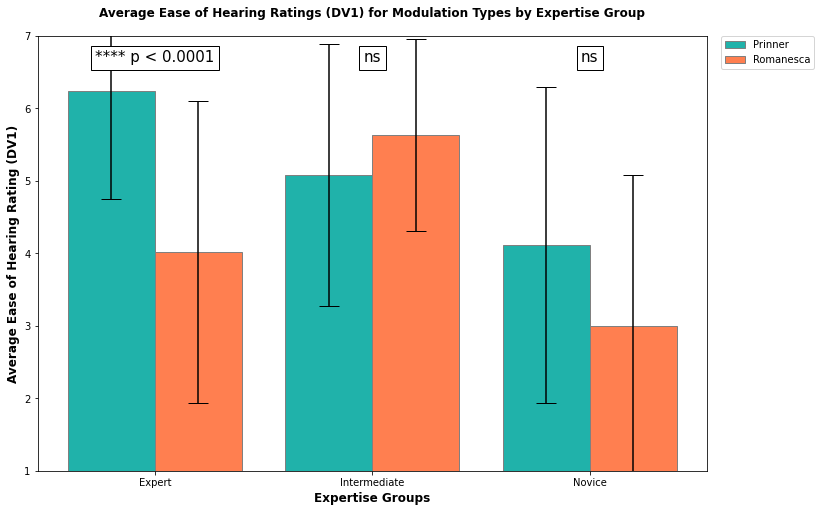

In [131]:
barWidth = 0.4
fig, ax = plt.subplots(figsize =(12, 8))

# set height of bar
Prin_ex = Expert_Mod.loc[[('Expert', 'Prinner'), ('Intermediate', 'Prinner'), ('Novice', 'Prinner')], [('mean', "DV")]].squeeze()
Rom_ex = Expert_Mod.loc[[('Expert', 'Romanesca'), ('Intermediate', 'Romanesca'), ('Novice', 'Romanesca')], [('mean', "DV")]].squeeze()


#stds
Prin_ex_std = Expert_Mod.loc[[('Expert', 'Prinner'), ('Intermediate', 'Prinner'), ('Novice', 'Prinner')], [('std', "DV")]].squeeze()
Rom_ex_std = Expert_Mod.loc[[('Expert', 'Romanesca'), ('Intermediate', 'Romanesca'), ('Novice', 'Romanesca')], [('std', "DV")]].squeeze()
 
# Set position of bar on X axis
br1_md = np.arange(len(Prin_ex))
br2_md = [x + (barWidth) for x in br1_md]
br3_md = [x + (barWidth*0.5) for x in br2_md]
 
# Make the plot
plt.bar(br1_md, Prin_ex, yerr=Prin_ex_std, ecolor='black', capsize=10, color ='lightseagreen', width = barWidth,
        edgecolor ='grey', label ='Prinner')
plt.bar(br2_md, Rom_ex, yerr=Rom_ex_std, ecolor='black', capsize=10, color ='coral', width = barWidth, 
        edgecolor ='grey', label ='Romanesca')

# Adding Xticks
plt.xlabel('Expertise Groups', fontweight ='bold', fontsize = 12)
plt.ylabel('Average Ease of Hearing Rating (DV1)', fontweight ='bold', fontsize = 12)
plt.xticks([r + (barWidth*0.5) for r in range(3)],
        ['Expert', 'Intermediate', 'Novice'])
ax.set_title('Average Ease of Hearing Ratings (DV1) for Modulation Types by Expertise Group', x=0.5, y=1.03, fontweight ='bold')

ax.set_ylim([1, 7])

# annotations
t1 = ax.text(0.20, 6.7, "**** p < 0.0001", ha="center", va="center", size=15,  bbox=dict(boxstyle='square', fc='white'))
t2 = ax.text(1.20, 6.7, "ns", ha="center", va="center", size=15,  bbox=dict(boxstyle='square', fc='white'))
t3 = ax.text(2.20, 6.7, "ns", ha="center", va="center", size=15,  bbox=dict(boxstyle='square', fc='white'))


plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

plt.savefig('Average DV1_Mod by Expertise.png', format='png', pad_inches=0.5, bbox_inches='tight')

plt.show()


**Sonata Section by Feature**

F(1.67, 26.68) = 6.68, p = 0.006, Corrected for violation of sphericity violation using GG, ε = 0.834

Tukey HSD post hoc revealed that the Bass (M = 5.59, sd = 1.44) and Soprano (M = 4.17, sd = 2.13) for the Recap differed significantly, (p = 0.005, 95% C.I. = [-2.48, -0.366]

In [100]:
Table_Sect_Feat_DV1

mean       std
                              DV        DV
Sonata_Section Feature                    
Exposition     Bass     5.300000  1.793080
               Schema   4.907895  2.148083
               Soprano  4.594737  2.030570
Recapitulation Bass     5.594737  1.442773
               Schema   4.950000  2.153533
               Soprano  4.171053  2.136922

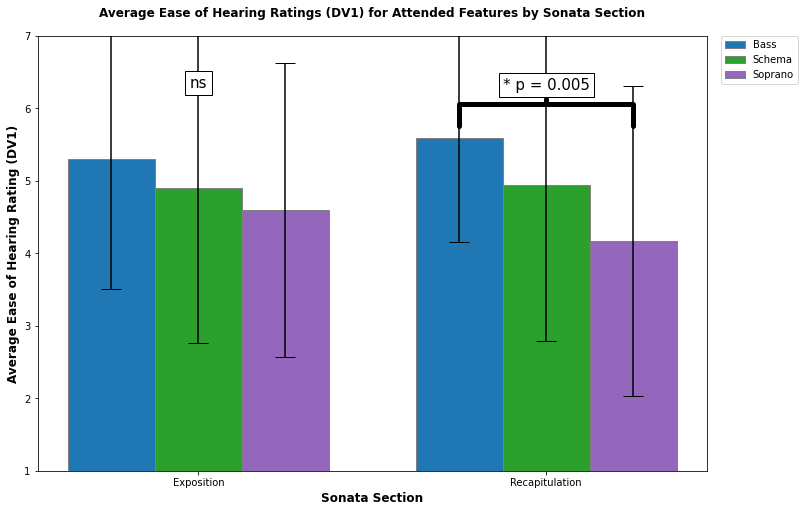

In [132]:
barWidth = 0.25
fig, ax = plt.subplots(figsize =(12, 8))

# set height of bar
bass_s = Table_Sect_Feat_DV1.loc[[('Exposition', 'Bass'), ('Recapitulation', 'Bass')], [('mean', "DV")]].squeeze()
schema_s = Table_Sect_Feat_DV1.loc[[('Exposition', 'Schema'), ('Recapitulation', 'Schema')], [('mean', "DV")]].squeeze()
sop_s = Table_Sect_Feat_DV1.loc[[('Exposition', 'Soprano'), ('Recapitulation', 'Soprano')], [('mean', "DV")]].squeeze()

#stds
bass_s_std = Table_Sect_Feat_DV1.loc[[('Exposition', 'Bass'), ('Recapitulation', 'Bass')], [('std', "DV")]].squeeze()
schema_s_std = Table_Sect_Feat_DV1.loc[[('Exposition', 'Schema'), ('Recapitulation', 'Schema')], [('std', "DV")]].squeeze()
sop_s_std = Table_Sect_Feat_DV1.loc[[('Exposition', 'Soprano'), ('Recapitulation', 'Soprano')], [('std', "DV")]].squeeze()
 
# Set position of bar on X axis
br1_s = np.arange(len(bass_s))
br2_s = [x + barWidth for x in br1_s]
br3_s = [x + barWidth for x in br2_s]
 
# Make the plot
plt.bar(br1_s, bass_s, yerr=bass_s_std, ecolor='black', capsize=10, color ='tab:blue', width = barWidth,
        edgecolor ='grey', label ='Bass')
plt.bar(br2_s, schema_s, yerr=schema_s_std, ecolor='black', capsize=10, color ='tab:green', width = barWidth,
        edgecolor ='grey', label ='Schema')
plt.bar(br3_s, sop_s, yerr=sop_s_std, ecolor='black', capsize=10, color ='tab:purple', width = barWidth,
        edgecolor ='grey', label ='Soprano')
 
# Adding Xticks
plt.xlabel('Sonata Section',fontweight ='bold', fontsize = 12)
plt.ylabel('Average Ease of Hearing Rating (DV1)', fontweight ='bold', fontsize = 12)
plt.xticks([r + barWidth for r in range(len(bass_s))],
        ['Exposition', 'Recapitulation'])
ax.set_title('Average Ease of Hearing Ratings (DV1) for Attended Features by Sonata Section', x=0.5, y=1.03, fontweight ='bold')

ax.set_ylim([1, 7])

# annotations
t1 = ax.text(0.25, 6.35, "ns", ha="center", va="center", size=15,  bbox=dict(boxstyle='square', fc='white'))
ax.annotate('* p = 0.005', xy=(0.76, 0.84), xytext=(0.76, 0.87), xycoords=('axes fraction'),
            fontsize=15, ha='center', va='bottom',
            bbox=dict(boxstyle='square', fc='white'),
            arrowprops=dict(arrowstyle='-[, widthB=5.8, lengthB=1.5', facecolor='blue', lw=5.0))

plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

plt.savefig('Average DV1_Feature by Sonata Section.png', format='png', pad_inches=0.5, bbox_inches='tight')

plt.show()


**Feature by Modulation Type**

F(1.95, 31.27) = 5.44, p = 0.010, Corrected for violation of sphericity violation using GG, ε = 0.977.

Post-hoc Tukey HSD revealed that for the Schema attending feature, the Prinner (M = 5.70, sd = 1.81) and Romanesca (M = 4.15, sd = 2.17) differed significantly, (p = 0.001, 95% C.I. = [-2.46, -0.637])

In [102]:
Table_Feat_Mod_DV1

mean       std
                         DV        DV
Feature Mod_Type                     
Bass    Prinner    5.434211  1.683991
        Romanesca  5.460526  1.582769
Schema  Prinner    5.705263  1.815838
        Romanesca  4.152632  2.172026
Soprano Prinner    4.407895  2.124170
        Romanesca  4.357895  2.066023

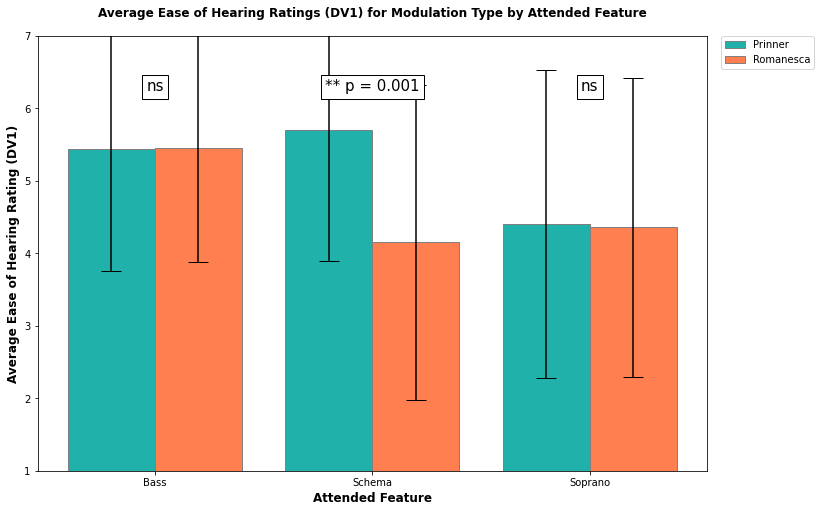

In [133]:
barWidth = 0.4
fig, ax = plt.subplots(figsize =(12, 8))

# set height of bar
Prin_m = Table_Feat_Mod_DV1.loc[[('Bass', 'Prinner'), ('Schema', 'Prinner'), ('Soprano','Prinner')], [('mean', "DV")]].squeeze()
Rom_m = Table_Feat_Mod_DV1.loc[[('Bass', 'Romanesca'), ('Schema', 'Romanesca'), ('Soprano','Romanesca')], [('mean', "DV")]].squeeze()

#stds
Prin_m_std = Table_Feat_Mod_DV1.loc[[('Bass', 'Prinner'), ('Schema', 'Prinner'), ('Soprano','Prinner')], [('std', "DV")]].squeeze()
Rom_m_std = Table_Feat_Mod_DV1.loc[[('Bass', 'Romanesca'), ('Schema', 'Romanesca'), ('Soprano','Romanesca')], [('std', "DV")]].squeeze()

 
# Set position of bar on X axis
br1_fm = np.arange(len(Prin_m))
br2_fm = [x + barWidth for x in br1_fm]
br3_fm = [x + barWidth for x in br2_fm]
 
# Make the plot
plt.bar(br1_fm, Prin_m, yerr=Prin_m_std, ecolor='black', capsize=10, color ='lightseagreen', width = barWidth,
        edgecolor ='grey', label ='Prinner')
plt.bar(br2_fm, Rom_m, yerr=Rom_m_std, ecolor='black', capsize=10, color ='coral', width = barWidth,
        edgecolor ='grey', label ='Romanesca')

# Adding Xticks
plt.xlabel('Attended Feature',fontweight ='bold', fontsize = 12)
plt.ylabel('Average Ease of Hearing Rating (DV1)', fontweight ='bold', fontsize = 12)
plt.xticks([r + (barWidth*0.5) for r in range(len(Prin_m))],
        ['Bass', 'Schema', "Soprano"])
ax.set_title('Average Ease of Hearing Ratings (DV1) for Modulation Type by Attended Feature', x=0.5, y=1.03, fontweight ='bold')

ax.set_ylim([1, 7])

# annotations
#ax.annotate('** p = 0.004', xy=(0.175, 0.84), xytext=(0.175, 0.88), xycoords=('axes fraction'),
            #fontsize=15, ha='center', va='bottom',
            #bbox=dict(boxstyle='square', fc='white'),
            #arrowprops=dict(arrowstyle='-[, widthB=2.9, lengthB=1.5', facecolor='blue', lw=5.0))

t1 = ax.text(0.20, 6.3, 'ns', ha="center", va="center", size=15,  bbox=dict(boxstyle='square', fc='white'))
t2 = ax.text(1.20, 6.3, "** p = 0.001", ha="center", va="center", size=15,  bbox=dict(boxstyle='square', fc='white'))
t3 = ax.text(2.20, 6.3, "ns", ha="center", va="center", size=15,  bbox=dict(boxstyle='square', fc='white'))

plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

plt.savefig('Average DV1_Mod by Feature.png', format='png', pad_inches=0.5, bbox_inches='tight')

plt.show()


_______
_______

## 5. Visualizations for RM ANOVA: DV2

**Nonsignificant Effects**

Nonsignficiant main effect of Sonata Section (F(1,16) = 0.157, p = 0.697

### a. Main Effects<a id = 'RM2a'></a>

**Expertise Group**

RM ANOVA revealed a main effect of expertise group, F(2, 16) = 4.78, p = 0.024 

Post doc Tukey HSD revealed that Expert and Intermediate groups differed from the Novice Group: Expert (M = 3.57, sd = 2.06) and Intermediate (M = 4.44, sd = 1.75), Novice (M = 1.88, sd = 1.50) groups.

Expert and Intermediate (p = 0.080, C.I. 95% C.I. = [-0.082, 1.82])
Expert and Novice (p = 0.002, 95% C.I. = [-2.87, -0.533]
Intermediate and Novice (p < 0.0001, 95% C.I. = [-3.60, -1.54]


In [104]:
Expert_DV2 = pd.pivot_table(data=df_DV2_long, index=["Expertise_Group"], values="DV2", aggfunc=['mean','std'])

Expert_DV2

,mean,std
,DV2,DV2
Expertise_Group,,
Expert,3.576667,2.065761
Intermediate,4.448333,1.756681
Novice,1.875000,1.503113


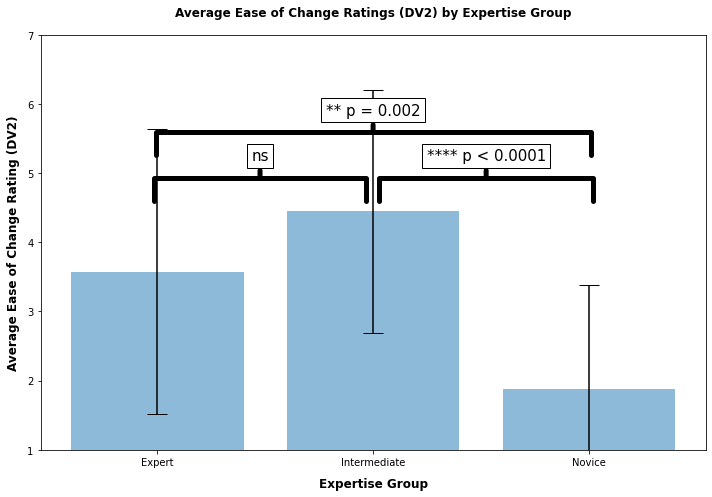

In [134]:
Groups = ["Expert", "Intermediate", 'Novice']
y_vals_ex2 = Expert_DV2[('mean', "DV2")]
std_ex2 = Expert_DV2[('std', "DV2")]
 
# Figure Size
fig, ax = plt.subplots(figsize =(10, 7))
 
# Horizontal Bar Plot
plt.bar(Groups, y_vals_ex2, yerr=std_ex2, color='tab:blue', align='center', alpha=0.5, ecolor='black', capsize=10)

ax.set_ylabel('Average Ease of Change Rating (DV2)', fontsize=12, labelpad=7, fontweight ='bold')
ax.set_xlabel("Expertise Group", fontsize=12, labelpad=10, fontweight ='bold')
ax.set_title('Average Ease of Change Ratings (DV2) by Expertise Group', x=0.5, y=1.03, fontweight ='bold')
ax.set_ylim([1, 7])

#annotations
ax.annotate('** p = 0.002', xy=(0.5, 0.76), xytext=(0.5, 0.80), xycoords='axes fraction', 
            fontsize=15, ha='center', va='bottom',
            bbox=dict(boxstyle='square', fc='white'),
            arrowprops=dict(arrowstyle='-[, widthB=14.5, lengthB=1.5', facecolor='blue', lw=5.0))

ax.annotate('**** p < 0.0001', xy=(0.67, 0.65), xytext=(0.67, 0.69), xycoords='axes fraction',
            fontsize=15, ha='center', va='bottom',
            bbox=dict(boxstyle='square', fc='white'),
            arrowprops=dict(arrowstyle='-[, widthB=7.15, lengthB=1.5', facecolor='blue', lw=5.0))

ax.annotate('ns', xy=(0.33, 0.65), xytext=(0.33, 0.69), xycoords='axes fraction',
            fontsize=15, ha='center', va='bottom',
            bbox=dict(boxstyle='square', fc='white'),
            arrowprops=dict(arrowstyle='-[, widthB=7.05, lengthB=1.5', facecolor='blue', lw=5.0))

#Save Plot
plt.tight_layout()
plt.savefig('Average DV2_Expertise Group.png', format='png')

# Show Plot
plt.show()


**Feature**

Significant main effect of feature F(1.56, 24.93) = 4.78, p = 0.024. Corrected for violation of sphericity violation using GG, ε = 0.779. 

Similar pattern to DV1, Bass (M = 4.14, sd = 1.96) and Soprano (M = 3.14, sd = 2.01), but post-hoc Tuckey HSD revealed however that none of these were signficant. 

In [106]:
Table_Feature_DV2

,mean,std
,DV2,DV2
Feature,,
Bass,4.144737,1.965472
Schema,3.742105,2.071640
Soprano,3.144737,2.018522


## 6. Biographical and Summary Statistics

In this section, I examine the bioragraphical information gathered from the background survey portion of the questionnaire. 

In [107]:
df_DV1_long.Random_IDs.value_counts().shape

(19,)

In [108]:
df_DV1_long.Random_IDs.unique()

array([913, 834, 719, 862, 686, 998, 473, 895, 326, 381, 268, 883, 475,
       392, 244, 148, 701, 540, 495])

In [109]:
df_DV1_long.columns

Index(['Random_IDs', 'Sonata_Section', 'Feature', 'Mod_Type', 'DV',
       'Education_Level', 'Years_Theory', 'Years_Skills', 'Schemata_Expertise',
       'Excerpt_Familiarity', 'Excerpt_Analysis', 'Solfege_Hearing',
       'Schema_Hearing', 'Perfect_Pitch?', 'Interpretation_App',
       'Expertise_Group', 'Expertise_Group_solf', 'Sonata_Order', 'Expo_Order',
       'Expo_Bass_Order', 'Expo_Sop_Order', 'Expo_Schema_Order', 'Recap_Order',
       'Recap_Bass_Order', 'Recap_Sop_Order', 'Recap_Schema_Order'],
      dtype='object')

In [110]:
df_DV2_long.shape

(114, 25)

In [111]:
df_DV1_long.Education_Level.value_counts()/12

Professor                  10.0
Graduate Student            6.0
Postdoctoral Researcher     2.0
Other, please specify:      1.0
Name: Education_Level, dtype: float64

Verfying Expertise Groups (category and hearing)

In [112]:
Expertise_groups_verification = pd.pivot_table(data=df_DV1_long, index=["Expertise_Group"], values=["Solfege_Hearing", 'Schema_Hearing'], aggfunc=['mean','std'])

Expertise_groups_verification

mean                            std                
                Schema_Hearing Solfege_Hearing Schema_Hearing Solfege_Hearing
Expertise_Group                                                              
Expert                    6.38            6.64       1.105426        0.462565
Intermediate              4.87            6.01       1.045567        0.618129
Novice                    1.25            5.50       0.437595        1.515873

In [113]:
df_DV1_long.Expertise_Group.value_counts()/12

Intermediate    10.0
Expert           5.0
Novice           4.0
Name: Expertise_Group, dtype: float64

In [114]:
Expertise_groups_verification.columns

MultiIndex([('mean',  'Schema_Hearing'),
            ('mean', 'Solfege_Hearing'),
            ( 'std',  'Schema_Hearing'),
            ( 'std', 'Solfege_Hearing')],
           )

In [136]:
df_Both_DVs

,Random_IDs,Sonata_Section,Feature,Mod_Type,DV,DV2,Education_Level,Years_Theory,Years_Skills,Schemata_Expertise,...,Expo_Sop_Order,Expo_Schema_Order,Recap_Order,Recap_Bass_Order,Recap_Sop_Order,Recap_Schema_Order,Familiarity_Cat,Familiarity_Numeric,Expertise_Numeric,Analysis_Numeric
Index,,,,,,,,,,,,,,,,,,,,,
0,913,Exposition,Bass,Romanesca,7.0,3.0,Professor,10 + years,10 + years,Completely unfamiliar,...,1,2,3,1,1,2,Medium,2.0,1.0,1.0
1,913,Exposition,Bass,Prinner,2.9,3.0,Professor,10 + years,10 + years,Completely unfamiliar,...,1,2,3,1,1,2,Medium,2.0,1.0,1.0
2,834,Exposition,Bass,Romanesca,5.1,4.7,Graduate Student,5-10 years,5-10 years,Familiar,...,2,2,1,2,2,1,Low,1.0,2.0,1.0
3,834,Exposition,Bass,Prinner,5.4,4.7,Graduate Student,5-10 years,5-10 years,Familiar,...,2,2,1,2,2,1,Low,1.0,2.0,1.0
4,719,Exposition,Bass,Romanesca,6.5,6.0,Graduate Student,1-2 years,3-5 years,Somewhat familiar,...,2,1,6,2,1,1,Medium,2.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235,701,Recapitulation,Schema,Prinner,7.0,1.1,Graduate Student,10 + years,10 + years,Very familiar,...,2,2,6,1,2,2,High,3.0,3.0,2.0
236,540,Recapitulation,Schema,Romanesca,5.6,7.0,Professor,5-10 years,5-10 years,"I am an expert (analysis, playing, composition...",...,2,2,4,2,2,2,High,3.0,3.0,2.0
237,540,Recapitulation,Schema,Prinner,7.0,7.0,Professor,5-10 years,5-10 years,"I am an expert (analysis, playing, composition...",...,2,2,4,2,2,2,High,3.0,3.0,2.0


**Expertise Designations: Solfege and Schema**

This visualization shows that all groups had similar levels of solfege expertise, but vastly different levels of Galant Schema Expertise.

In [137]:
Expertise_groups_verification_all = pd.pivot_table(data=df_Both_DVs, index=["Expertise_Group"], values=["Solfege_Hearing", 'Schema_Hearing'], aggfunc=['mean','std'])

Expertise_groups_verification_all

mean                            std                
                Schema_Hearing Solfege_Hearing Schema_Hearing Solfege_Hearing
Expertise_Group                                                              
Expert                    6.38            6.64       1.105426        0.462565
Intermediate              4.87            6.01       1.045567        0.618129
Novice                    1.25            5.50       0.437595        1.515873

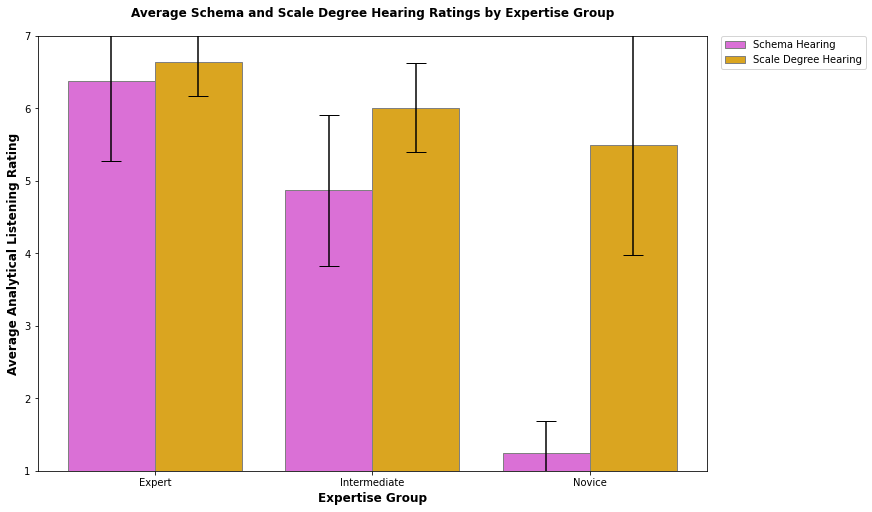

In [138]:
barWidth = 0.4
fig, ax = plt.subplots(figsize =(12, 8))

# set height of bar
SCH = Expertise_groups_verification_all.loc[['Expert', 'Intermediate', "Novice"], [('mean', "Schema_Hearing")]].squeeze()
SOL = Expertise_groups_verification_all.loc[['Expert', 'Intermediate', "Novice"], [('mean', "Solfege_Hearing")]].squeeze()


#stds
SCH_std = Expertise_groups_verification_all.loc[['Expert', 'Intermediate', "Novice"], [('std', "Schema_Hearing")]].squeeze()
SOL_std = Expertise_groups_verification_all.loc[['Expert', 'Intermediate', "Novice"], [('std', "Solfege_Hearing")]].squeeze()
 
# Set position of bar on X axis
br1_v = np.arange(len(Prin_m))
br2_v = [x + barWidth for x in br1_fm]
br3_v = [x + barWidth for x in br2_fm]
 
# Make the plot
plt.bar(br1_v, SCH, yerr=SCH_std, ecolor='black', capsize=10, color ='orchid', width = barWidth,
        edgecolor ='grey', label ='Schema Hearing')
plt.bar(br2_v, SOL, yerr=SOL_std, ecolor='black', capsize=10, color ='goldenrod', width = barWidth,
        edgecolor ='grey', label ='Scale Degree Hearing')

# Adding Xticks
plt.xlabel('Expertise Group',fontweight ='bold', fontsize = 12)
plt.ylabel('Average Analytical Listening Rating', fontweight ='bold', fontsize = 12)
plt.xticks([r + (barWidth*0.5) for r in range(len(Prin_m))],
        ['Expert', 'Intermediate', "Novice"])

ax.set_title('Average Schema and Scale Degree Hearing Ratings by Expertise Group', x=0.5, y=1.03, 
             fontweight ='bold')

ax.set_ylim([1, 7])

plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

plt.savefig('Expertise Verification.png', format='png', pad_inches=0.5, bbox_inches='tight')

plt.show()


In [139]:
df_DV1_long.Schemata_Expertise.value_counts()/12

Very familiar                                            6.0
Somewhat familiar                                        5.0
I am an expert (analysis, playing, composition, etc.)    4.0
Completely unfamiliar                                    2.0
Familiar                                                 2.0
Name: Schemata_Expertise, dtype: float64

In [140]:
df_DV1_long.Expertise_Group.value_counts()/12

Intermediate    10.0
Expert           5.0
Novice           4.0
Name: Expertise_Group, dtype: float64

In [141]:
group_test = pd.pivot_table(data=df_DV1_long, values='Schema_Hearing', index=['Expertise_Group', 'Random_IDs', 'Schemata_Expertise'])
group_test

Schema_Hearing
Expertise_Group Random_IDs Schemata_Expertise                                                
Expert          244        I am an expert (analysis, playing, composition,...             7.0
                392        I am an expert (analysis, playing, composition,...             4.2
                475        I am an expert (analysis, playing, composition,...             7.0
                540        I am an expert (analysis, playing, composition,...             7.0
                701        Very familiar                                                  6.7
Intermediate    148        Somewhat familiar                                              4.0
                268        Very familiar                                                  5.5
                326        Familiar                                                       4.0
                473        Somewhat familiar                                              5.1
                495        Very familiar                                                  5.0
                686        Very familiar                                                  7.0
                719        Somewhat familiar                                              4.5
                834        Familiar                                                       5.7
                862        Very familiar                                                  4.9
                883        Very familiar                                                  3.0
Novice          381        Somewhat familiar                                              1.0
                895        Completely unfamiliar                                          1.0
                913        Completely unfamiliar                                          1.0
                998        Somewhat familiar                                              2.0

In [142]:
df_int = df_DV1_long[df_DV1_long["Expertise_Group"] == 'Intermediate']

vals = pd.pivot_table(data=df_int, values='Schema_Hearing', index=['Schemata_Expertise'], aggfunc=['mean', 'std'])

vals

,mean,std
,Schema_Hearing,Schema_Hearing
Schemata_Expertise,,
Familiar,4.850000,0.868282
Somewhat familiar,4.533333,0.456070
Very familiar,5.080000,1.293635


In [143]:
df_nov = df_DV1_long[df_DV1_long["Expertise_Group"] == 'Novice']

vals2 = pd.pivot_table(data=df_nov, values='Schema_Hearing', index=['Schemata_Expertise'], aggfunc=['mean', 'std'])

vals2

,mean,std
,Schema_Hearing,Schema_Hearing
Schemata_Expertise,,
Completely unfamiliar,1.0,0.000000
Somewhat familiar,1.5,0.510754


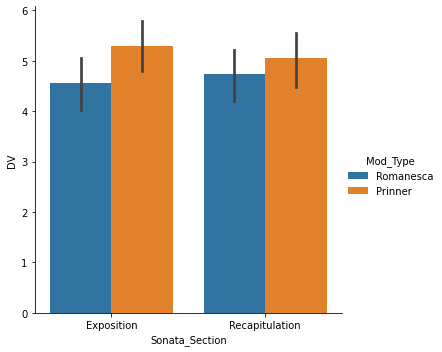

In [144]:
sns.catplot(data=df_DV1_long, y='DV', x='Sonata_Section', hue="Mod_Type", kind='bar')

Those with perfect pitch

In [146]:
vals = df_DV1_long.loc[:, ['Expertise_Group', 'Perfect_Pitch?']]

vals.value_counts()/12


Expertise_Group  Perfect_Pitch?
Intermediate     No                10.0
Expert           No                 3.0
Novice           No                 3.0
Expert           Yes                2.0
Novice           Yes                1.0
dtype: float64

In [147]:
df_DV1_long.columns

Index(['Random_IDs', 'Sonata_Section', 'Feature', 'Mod_Type', 'DV',
       'Education_Level', 'Years_Theory', 'Years_Skills', 'Schemata_Expertise',
       'Excerpt_Familiarity', 'Excerpt_Analysis', 'Solfege_Hearing',
       'Schema_Hearing', 'Perfect_Pitch?', 'Interpretation_App',
       'Expertise_Group', 'Expertise_Group_solf', 'Sonata_Order', 'Expo_Order',
       'Expo_Bass_Order', 'Expo_Sop_Order', 'Expo_Schema_Order', 'Recap_Order',
       'Recap_Bass_Order', 'Recap_Sop_Order', 'Recap_Schema_Order'],
      dtype='object')

### Interpretation Techniques Most Used

Here I examine the most common interpretation techniques used by the different groups as gathered from the `Interpretation_App` columns:

In [148]:
Interpretations = df_DV1_long.loc[:, ['Expertise_Group', 'Interpretation_App']]

Interpretations

,Expertise_Group,Interpretation_App
Index,,
0,Novice,"I have no idea, I could just hear it!,I imagin..."
1,Intermediate,I imagined scale degrees or solfege as I listened
2,Intermediate,I imagined scale degrees or solfege as I liste...
3,Intermediate,I imagined scale degrees or solfege as I liste...
4,Intermediate,I imagined scale degrees or solfege as I liste...
...,...,...
15,Expert,I imagined scale degrees or solfege as I liste...
16,Intermediate,I imagined scale degrees or solfege as I liste...
17,Expert,I imagined scale degrees or solfege as I liste...


In [149]:
responses = [val.strip() for sublist in Interpretations.Interpretation_App.str.split(",").tolist() for val in sublist]

responses

['I have no idea',
 'I could just hear it!',
 'I imagined scale degrees or solfege as I listened',
 'I imagined or sung/spoke the interpretation between listenings',
 'I imagined scale degrees or solfege as I listened',
 'I imagined scale degrees or solfege as I listened',
 'I sang or spoke (without scale degrees or solfege)',
 'I imagined scale degrees or solfege as I listened',
 'I subvocalized (silent rehearsal',
 'spoken or sung) scale degrees or solfege while listening',
 'I imagined scale degrees or solfege as I listened',
 'I subvocalized (silent rehearsal',
 'spoken or sung) scale degrees or solfege while listening',
 'I imagined scale degrees or solfege as I listened',
 'I subvocalized (silent rehearsal',
 'spoken or sung) scale degrees or solfege while listening',
 'I sang or spoke (without scale degrees or solfege)',
 'I spoke or sang scale degrees or solfege while listening',
 'I have no idea',
 'I could just hear it!',
 'I imagined scale degrees or solfege as I listened',


**Summary of All Response Types**

The most common techniques used were: 

- imagining scale degrees while listening
- subvocalizing scale degrees while listening
- speaking or singing scale degrees while listening 

In [150]:
res = {}

for i in responses:
    res[i] = responses.count(i)/12
    
print(res)

{'I have no idea': 4.0, 'I could just hear it!': 4.0, 'I imagined scale degrees or solfege as I listened': 14.0, 'I imagined or sung/spoke the interpretation between listenings': 4.0, 'I sang or spoke (without scale degrees or solfege)': 5.0, 'I subvocalized (silent rehearsal': 9.0, 'spoken or sung) scale degrees or solfege while listening': 9.0, 'I spoke or sang scale degrees or solfege while listening': 7.0, 'I played an instrument': 3.0, 'Other (please specify)': 1.0}


**Interpretation Techniques by Expertise Group**

In [151]:
#Same, but by Expertise Group
Expert = Interpretations[Interpretations['Expertise_Group'] == 'Expert']
Intermediate = Interpretations[Interpretations['Expertise_Group'] == 'Intermediate']
Novice = Interpretations[Interpretations['Expertise_Group'] == 'Novice']

Novice

,Expertise_Group,Interpretation_App
Index,,
0,Novice,"I have no idea, I could just hear it!,I imagin..."
6,Novice,I imagined scale degrees or solfege as I liste...
8,Novice,"I have no idea, I could just hear it!,I imagin..."
10,Novice,I imagined scale degrees or solfege as I liste...
0,Novice,"I have no idea, I could just hear it!,I imagin..."
6,Novice,I imagined scale degrees or solfege as I liste...
8,Novice,"I have no idea, I could just hear it!,I imagin..."
10,Novice,I imagined scale degrees or solfege as I liste...
0,Novice,"I have no idea, I could just hear it!,I imagin..."


In [152]:
responses_Ex = [val.strip() for sublist in Expert.Interpretation_App.str.split(",").tolist() for val in sublist]

responses_Int = [val.strip() for sublist in Intermediate.Interpretation_App.str.split(",").tolist() for val in sublist]

responses_Nov = [val.strip() for sublist in Novice.Interpretation_App.str.split(",").tolist() for val in sublist]

The groups used approximately the same types of interpretation techniques:

In [157]:
def discovery(x):
    listy = {}
    for i in x:
        listy[i] = x.count(i)/12
    return listy

ExpertD = discovery(responses_Ex)
IntermediateD = discovery(responses_Int)
NoviceD = discovery(responses_Nov)

In [154]:
ExpertD

{'Other (please specify)': 1.0,
 'I have no idea': 1.0,
 'I could just hear it!': 1.0,
 'I imagined scale degrees or solfege as I listened': 3.0,
 'I subvocalized (silent rehearsal': 2.0,
 'spoken or sung) scale degrees or solfege while listening': 2.0,
 'I sang or spoke (without scale degrees or solfege)': 1.0,
 'I played an instrument': 2.0,
 'I spoke or sang scale degrees or solfege while listening': 1.0,
 'I imagined or sung/spoke the interpretation between listenings': 1.0}

In [155]:
IntermediateD

{'I imagined scale degrees or solfege as I listened': 7.0,
 'I sang or spoke (without scale degrees or solfege)': 2.0,
 'I subvocalized (silent rehearsal': 5.0,
 'spoken or sung) scale degrees or solfege while listening': 5.0,
 'I spoke or sang scale degrees or solfege while listening': 5.0,
 'I have no idea': 1.0,
 'I could just hear it!': 1.0,
 'I played an instrument': 1.0,
 'I imagined or sung/spoke the interpretation between listenings': 1.0}

In [156]:
NoviceD

{'I have no idea': 2.0,
 'I could just hear it!': 2.0,
 'I imagined scale degrees or solfege as I listened': 4.0,
 'I imagined or sung/spoke the interpretation between listenings': 2.0,
 'I subvocalized (silent rehearsal': 2.0,
 'spoken or sung) scale degrees or solfege while listening': 2.0,
 'I sang or spoke (without scale degrees or solfege)': 2.0,
 'I spoke or sang scale degrees or solfege while listening': 1.0}

Expert Group Three Way (nonsig)

In [158]:
Expert_only = df_DV1_long[df_DV1_long['Expertise_Group'] == 'Expert']

Expert = pd.pivot_table(data=Expert_only, values="DV", index=['Feature', 'Mod_Type'], aggfunc=['mean', 'std'])

Expert

mean       std
                     DV        DV
Feature Mod_Type                 
Bass    Prinner    6.52  1.234504
        Romanesca  5.11  1.665633
Schema  Prinner    6.75  0.790569
        Romanesca  2.68  1.591505
Soprano Prinner    5.46  2.011743
        Romanesca  4.28  2.303041

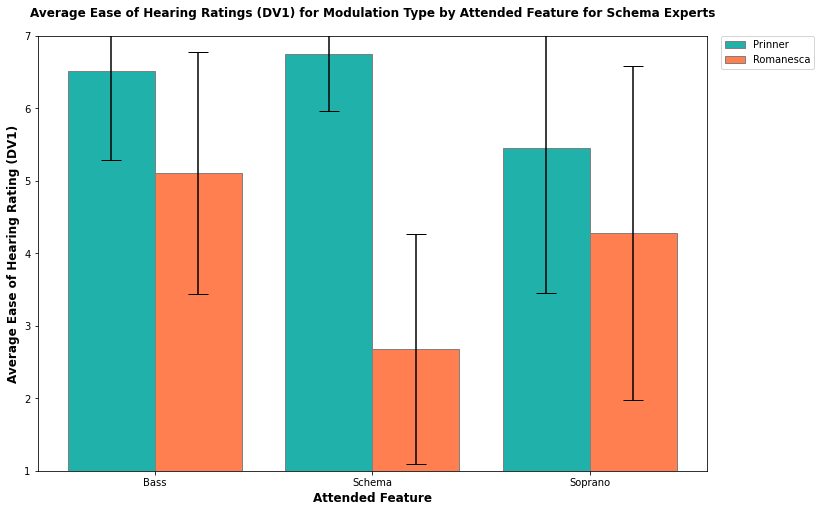

In [159]:
barWidth = 0.4
fig, ax = plt.subplots(figsize =(12, 8))

# set height of bar
Prin_mEx = Expert.loc[[('Bass', 'Prinner'), ('Schema', 'Prinner'), ('Soprano','Prinner')], [('mean', "DV")]].squeeze()
Rom_mEx = Expert.loc[[('Bass', 'Romanesca'), ('Schema', 'Romanesca'), ('Soprano','Romanesca')], [('mean', "DV")]].squeeze()

#stds
Prin_mEx_std = Expert.loc[[('Bass', 'Prinner'), ('Schema', 'Prinner'), ('Soprano','Prinner')], [('std', "DV")]].squeeze()
Rom_mEx_std = Expert.loc[[('Bass', 'Romanesca'), ('Schema', 'Romanesca'), ('Soprano','Romanesca')], [('std', "DV")]].squeeze()

 
# Set position of bar on X axis
br1_fm_Ex = np.arange(len(Prin_mEx))
br2_fm_Ex = [x + barWidth for x in br1_fm_Ex]
br3_fm_Ex = [x + barWidth for x in br2_fm_Ex]
 
# Make the plot
plt.bar(br1_fm_Ex, Prin_mEx, yerr=Prin_mEx_std, ecolor='black', capsize=10, color ='lightseagreen', width = barWidth,
        edgecolor ='grey', label ='Prinner')
plt.bar(br2_fm_Ex, Rom_mEx, yerr=Rom_mEx_std, ecolor='black', capsize=10, color ='coral', width = barWidth,
        edgecolor ='grey', label ='Romanesca')

# Adding Xticks
plt.xlabel('Attended Feature',fontweight ='bold', fontsize = 12)
plt.ylabel('Average Ease of Hearing Rating (DV1)', fontweight ='bold', fontsize = 12)
plt.xticks([r + (barWidth*0.5) for r in range(len(Prin_mEx))],
        ['Bass', 'Schema', "Soprano"])
ax.set_title('Average Ease of Hearing Ratings (DV1) for Modulation Type by Attended Feature for Schema Experts', x=0.5, y=1.03, fontweight ='bold')

ax.set_ylim([1, 7])



plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

plt.savefig('Average DV1_Mod by Feature_ExpertGroup.png', format='png', pad_inches=0.5, bbox_inches='tight')

plt.show()

## 7. Familiarity Analysis

An ordinal logistic regression was performed in order to see if familiarity category (low, medium, high) was able to significantly predict expertise group (novice, intermediate, expert).  

In [203]:
df_familiar = pd.read_csv('Both_DVs_Familiar.csv')

df_familiar.Excerpt_Analysis.unique()

df_familiar.drop(columns='Unnamed: 0', inplace=True)


Convert data types to Ordinal! 

In [204]:
from pandas.api.types import CategoricalDtype

cat_type1 = CategoricalDtype(categories=['Novice','Intermediate', 'Expert'], ordered=True)
cat_type2 = CategoricalDtype(categories=['Low','Medium', 'High' ], ordered=True)
cat_type3 = CategoricalDtype(categories=['No, not at all', 'Yes, somewhat'], ordered=True)
df_familiar["Expertise_Group"] = df_familiar["Expertise_Group"].astype(cat_type1)
df_familiar["Familiarity_Cat"] = df_familiar["Familiarity_Cat"].astype(cat_type2)
df_familiar["Excerpt_Analysis"] = df_familiar["Excerpt_Analysis"].astype(cat_type3)

df_familiar['Familiarity_Cat'].dtype

CategoricalDtype(categories=['Low', 'Medium', 'High'], ordered=True)

Create Numeric versions of analysis column:

In [205]:
bool_ana1 = (df_familiar["Excerpt_Analysis"] == 'Yes, somewhat')
bool_ana2 = (df_familiar["Excerpt_Analysis"] == 'No, not at all')

df_familiar.loc[bool_ana1, "Analysis_Numeric"] = 2
df_familiar.loc[bool_ana2, "Analysis_Numeric"] = 1

df_familiar

,Random_IDs,Sonata_Section,Feature,Mod_Type,DV,DV2,Excerpt_Familiarity,Excerpt_Analysis,Expertise_Group,Familiarity_Cat,Familiarity_Numeric,Expertise_Numeric,Analysis_Numeric
0,913,Exposition,Bass,Romanesca,7.0,3.0,I have heard this before,"No, not at all",Novice,Medium,2.0,1.0,1.0
1,913,Exposition,Bass,Prinner,2.9,3.0,I have heard this before,"No, not at all",Novice,Medium,2.0,1.0,1.0
2,834,Exposition,Bass,Romanesca,5.1,4.7,This was the first time I have heard this,"No, not at all",Intermediate,Low,1.0,2.0,1.0
3,834,Exposition,Bass,Prinner,5.4,4.7,This was the first time I have heard this,"No, not at all",Intermediate,Low,1.0,2.0,1.0
4,719,Exposition,Bass,Romanesca,6.5,6.0,I have heard this before,"No, not at all",Intermediate,Medium,2.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
223,701,Recapitulation,Schema,Prinner,7.0,1.1,I have heard this before,"Yes, somewhat",Expert,High,3.0,3.0,2.0
224,540,Recapitulation,Schema,Romanesca,5.6,7.0,I have heard this before,"Yes, somewhat",Expert,High,3.0,3.0,2.0
225,540,Recapitulation,Schema,Prinner,7.0,7.0,I have heard this before,"Yes, somewhat",Expert,High,3.0,3.0,2.0
226,495,Recapitulation,Schema,Romanesca,4.0,3.0,This was the first time I have heard this,"No, not at all",Intermediate,Low,1.0,2.0,1.0


In [206]:
df_familiar.dtypes

Random_IDs                int64
Sonata_Section           object
Feature                  object
Mod_Type                 object
DV                      float64
DV2                     float64
Excerpt_Familiarity      object
Excerpt_Analysis       category
Expertise_Group        category
Familiarity_Cat        category
Familiarity_Numeric     float64
Expertise_Numeric       float64
Analysis_Numeric        float64
dtype: object

**Ordinal Logit Model**

In [225]:
from statsmodels.miscmodels.ordinal_model import OrderedModel

## Testing the null
mod_prob = OrderedModel(df_familiar['Expertise_Group'],
                        df_familiar.loc[:,['Familiarity_Numeric', 'Analysis_Numeric']],
                        distr='probit')

res_prob = mod_prob.fit(method='bfgs')
res_prob.summary()


Optimization terminated successfully.
         Current function value: 0.847417
         Iterations: 15
         Function evaluations: 17
         Gradient evaluations: 17


<class 'statsmodels.iolib.summary.Summary'>
"""
                             OrderedModel Results                             
==============================================================================
Dep. Variable:        Expertise_Group   Log-Likelihood:                -193.21
Model:                   OrderedModel   AIC:                             394.4
Method:            Maximum Likelihood   BIC:                             408.1
Date:                Fri, 04 Nov 2022                                         
Time:                        13:50:22                                         
No. Observations:                 228                                         
Df Residuals:                     224                                         
Df Model:                           4                                         
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
Familiarity_Numeric     1.2885      0.190      6.768      0.000       0.915       1.662
Analysis_Numeric       -0.8416      0.332     -2.536      0.011      -1.492      -0.191
Novice/Intermediate     0.2566      0.245      1.048      0.295      -0.223       0.737
Intermediate/Expert     0.6182      0.081      7.603      0.000       0.459       0.778
=======================================================================================
"""

In [226]:
predicted = res_prob.model.predict(res_prob.params, exog=df_familiar[['Familiarity_Numeric', "Analysis_Numeric"]])
predicted

/opt/anaconda3/lib/python3.9/site-packages/statsmodels/miscmodels/ordinal_model.py:419: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  xb = xb[:, None]


array([[0.06960433, 0.57726584, 0.35312983],
       [0.06960433, 0.57726584, 0.35312983],
       [0.42455184, 0.52752831, 0.04791985],
       [0.42455184, 0.52752831, 0.04791985],
       [0.06960433, 0.57726584, 0.35312983],
       [0.06960433, 0.57726584, 0.35312983],
       [0.42455184, 0.52752831, 0.04791985],
       [0.42455184, 0.52752831, 0.04791985],
       [0.42455184, 0.52752831, 0.04791985],
       [0.42455184, 0.52752831, 0.04791985],
       [0.42455184, 0.52752831, 0.04791985],
       [0.42455184, 0.52752831, 0.04791985],
       [0.06960433, 0.57726584, 0.35312983],
       [0.06960433, 0.57726584, 0.35312983],
       [0.42455184, 0.52752831, 0.04791985],
       [0.42455184, 0.52752831, 0.04791985],
       [0.02707672, 0.44502858, 0.5278947 ],
       [0.02707672, 0.44502858, 0.5278947 ],
       [0.42455184, 0.52752831, 0.04791985],
       [0.42455184, 0.52752831, 0.04791985],
       [0.42455184, 0.52752831, 0.04791985],
       [0.42455184, 0.52752831, 0.04791985],
       [0.

In [208]:
modf_logit = OrderedModel.from_formula("Expertise_Group ~ Excerpt_Familiarity", df_familiar,
                                      distr='logit')
resf_logit = modf_logit.fit(method='bfgs')
resf_logit.summary()



Optimization terminated successfully.
         Current function value: 0.841924
         Iterations: 19
         Function evaluations: 20
         Gradient evaluations: 20


<class 'statsmodels.iolib.summary.Summary'>
"""
                             OrderedModel Results                             
==============================================================================
Dep. Variable:        Expertise_Group   Log-Likelihood:                -191.96
Model:                   OrderedModel   AIC:                             391.9
Method:            Maximum Likelihood   BIC:                             405.6
Date:                Fri, 04 Nov 2022                                         
Time:                        13:33:26                                         
No. Observations:                 228                                         
Df Residuals:                     224                                         
Df Model:                           4                                         
====================================================================================================================================
                                                                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------------------
Excerpt_Familiarity[T.I have heard this before]                      1.5174      0.600      2.529      0.011       0.342       2.693
Excerpt_Familiarity[T.This was the first time I have heard this]    -1.2743      0.601     -2.119      0.034      -2.453      -0.096
Novice/Intermediate                                                 -1.6513      0.577     -2.863      0.004      -2.782      -0.521
Intermediate/Expert                                                  1.1943      0.094     12.650      0.000       1.009       1.379
====================================================================================================================================
"""

**SUMMARY**

The predictive (AIC=391.9) model was not a better fit than the null model (AIC = 498.9, X2 = 0.59, p = 0.7423), Pseudo R2 = 0.001(McFadden). This indicates that excerpt familiarity is not predictive of expertise group. Therefore, the observed results of expertise group above can be attributed to generalized schemata expertise, and not to familiarity with the excerpt itself. 

In [209]:
ex = (df_familiar[df_familiar['Expertise_Group']=='Expert'])

ex.Excerpt_Familiarity.value_counts()/12

I have heard this before    5.0
Name: Excerpt_Familiarity, dtype: float64

In [210]:
df_familiar.Excerpt_Analysis.value_counts()/12

No, not at all    15.0
Yes, somewhat      4.0
Name: Excerpt_Analysis, dtype: float64

In [211]:
ex_gr = df_familiar.groupby(by='Expertise_Group')

ex_gr.Excerpt_Familiarity.value_counts()/12

Expertise_Group  Excerpt_Familiarity                      
Novice           This was the first time I have heard this    3.0
                 I have heard this before                     1.0
Intermediate     This was the first time I have heard this    5.0
                 I have heard this before                     4.0
                 I am very familiar with this piece           1.0
Expert           I have heard this before                     5.0
Name: Excerpt_Familiarity, dtype: float64

In [212]:
ex_gr.Excerpt_Analysis.value_counts()/12

Expertise_Group                
Novice           No, not at all    4.0
                 Yes, somewhat     0.0
Intermediate     No, not at all    8.0
                 Yes, somewhat     2.0
Expert           No, not at all    3.0
                 Yes, somewhat     2.0
Name: Excerpt_Analysis, dtype: float64